In [ ]:
install.packages("car")
install.packages("corrplot")
install.packages("ggplot2")
install.packages("MASS")
install.packages('DescTools')
install.packages('finalfit')
library(ggplot2)
library(car)
library(corrplot)
library(MASS)
library(DescTools)
library(finalfit)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:
file_path <- "/content/CarPrice_Assignment.csv"

car_data <- read.csv(file_path)

# Display the first few rows of the dataframe
head(car_data)

In [5]:
# View the entire dataframe
View(car_data[1:10,])

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,⋯,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.00
2,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.00
3,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.00
4,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.00
5,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.00
6,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.00
7,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.00
8,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.00
9,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.00


In [6]:
car_data['CarName']

CarName
<chr>
alfa-romero giulia
alfa-romero stelvio
alfa-romero Quadrifoglio
audi 100 ls
audi 100ls
audi fox
audi 100ls
audi 5000
audi 4000


In [7]:
summary(car_data)

     car_ID      symboling         CarName            fueltype        
 Min.   :  1   Min.   :-2.0000   Length:205         Length:205        
 1st Qu.: 52   1st Qu.: 0.0000   Class :character   Class :character  
 Median :103   Median : 1.0000   Mode  :character   Mode  :character  
 Mean   :103   Mean   : 0.8341                                        
 3rd Qu.:154   3rd Qu.: 2.0000                                        
 Max.   :205   Max.   : 3.0000                                        
  aspiration         doornumber          carbody           drivewheel       
 Length:205         Length:205         Length:205         Length:205        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                         

In [8]:
sapply(car_data[, c("wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price")], function(x) c(mean = mean(x), sd = sd(x), min = min(x), Q1 = quantile(x, 0.25), median = median(x), Q3 = quantile(x, 0.75), max = max(x)))

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
mean,98.756585,174.04927,65.907805,53.724878,2555.5659,126.90732,3.3297561,3.255415,10.14254,104.11707,5125.1220,25.219512,30.751220,13276.711
sd,6.021776,12.33729,2.145204,2.443522,520.6802,41.64269,0.2708437,0.313597,3.97204,39.54417,476.9856,6.542142,6.886443,7988.852
min,86.600000,141.10000,60.300000,47.800000,1488.0000,61.00000,2.5400000,2.070000,7.00000,48.00000,4150.0000,13.000000,16.000000,5118.000
Q1.25%,94.500000,166.30000,64.100000,52.000000,2145.0000,97.00000,3.1500000,3.110000,8.60000,70.00000,4800.0000,19.000000,25.000000,7788.000
median,97.000000,173.20000,65.500000,54.100000,2414.0000,120.00000,3.3100000,3.290000,9.00000,95.00000,5200.0000,24.000000,30.000000,10295.000
Q3.75%,102.400000,183.10000,66.900000,55.500000,2935.0000,141.00000,3.5800000,3.410000,9.40000,116.00000,5500.0000,30.000000,34.000000,16503.000
max,120.900000,208.10000,72.300000,59.800000,4066.0000,326.00000,3.9400000,4.170000,23.00000,288.00000,6600.0000,49.000000,54.000000,45400.000


In [9]:
# Count null values in each column
null_counts <- colSums(is.na(car_data))

# Print the count of null values for each column
print(null_counts)

          car_ID        symboling          CarName         fueltype 
               0                0                0                0 
      aspiration       doornumber          carbody       drivewheel 
               0                0                0                0 
  enginelocation        wheelbase        carlength         carwidth 
               0                0                0                0 
       carheight       curbweight       enginetype   cylindernumber 
               0                0                0                0 
      enginesize       fuelsystem        boreratio           stroke 
               0                0                0                0 
compressionratio       horsepower          peakrpm          citympg 
               0                0                0                0 
      highwaympg            price 
               0                0 


In [10]:
# Check for null values in the dataframe
any_nulls <- any(is.na(car_data))

if (any_nulls) {
  print("There are null values in the dataframe.")
} else {
  print("There are no null values in the dataframe.")
}

[1] "There are no null values in the dataframe."


In [11]:
car_data$CompanyName <- sapply(strsplit(car_data$CarName, " "), "[", 1)

In [12]:
head(car_data)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,⋯,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>
1,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,⋯,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,alfa-romero
2,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,⋯,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,alfa-romero
3,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,⋯,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,alfa-romero
4,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,⋯,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,audi
5,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,⋯,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,audi
6,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,⋯,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,audi


In [13]:
# Assuming 'car_data' is your dataframe in R

# Reorder the columns, moving 'CompanyName' to the 3rd position
car_data <- car_data[, c(1:2, ncol(car_data), 3:(ncol(car_data)-1))]

# Display the first few rows of the updated dataframe
head(car_data)

,car_ID,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,⋯,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,5,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,6,2,audi,audi fox,gas,std,two,sedan,fwd,front,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [14]:
unique_company_names <- unique(car_data$CompanyName)

# Display unique company names
print(unique_company_names)

 [1] "alfa-romero" "audi"        "bmw"         "chevrolet"   "dodge"      
 [6] "honda"       "isuzu"       "jaguar"      "maxda"       "mazda"      
[11] "buick"       "mercury"     "mitsubishi"  "Nissan"      "nissan"     
[16] "peugeot"     "plymouth"    "porsche"     "porcshce"    "renault"    
[21] "saab"        "subaru"      "toyota"      "toyouta"     "vokswagen"  
[26] "volkswagen"  "vw"          "volvo"      


In [15]:
# Assuming 'car_data' is your dataframe in R

# Convert 'CompanyName' column to lowercase
car_data$CompanyName <- tolower(car_data$CompanyName)

# Convert 'CarName' column to lowercase
car_data$CarName <- tolower(car_data$CarName)

In [16]:
unique_company_names <- unique(car_data$CompanyName)

# Display unique company names
print(unique_company_names)

 [1] "alfa-romero" "audi"        "bmw"         "chevrolet"   "dodge"      
 [6] "honda"       "isuzu"       "jaguar"      "maxda"       "mazda"      
[11] "buick"       "mercury"     "mitsubishi"  "nissan"      "peugeot"    
[16] "plymouth"    "porsche"     "porcshce"    "renault"     "saab"       
[21] "subaru"      "toyota"      "toyouta"     "vokswagen"   "volkswagen" 
[26] "vw"          "volvo"      


In [17]:
# Assuming 'car_data' is your dataframe in R

# Correct spelling errors in 'CarName' column
car_data$CarName <- gsub("maxda", "mazda", car_data$CarName)
car_data$CarName <- gsub("porsche", "porcshce", car_data$CarName)
car_data$CarName <- gsub("toyouta", "toyota", car_data$CarName)
car_data$CarName <- gsub("vokswagen", "volkswagen", car_data$CarName)
car_data$CarName <- gsub("vw", "volkswagen", car_data$CarName)

# Correct spelling errors in 'CompanyName' column
car_data$CompanyName <- gsub("maxda", "mazda", car_data$CompanyName)
car_data$CompanyName <- gsub("porsche", "porcshce", car_data$CompanyName)
car_data$CompanyName <- gsub("toyouta", "toyota", car_data$CompanyName)
car_data$CompanyName <- gsub("vokswagen", "volkswagen", car_data$CompanyName)
car_data$CompanyName <- gsub("vw", "volkswagen", car_data$CompanyName)

In [18]:
unique_company_names <- unique(car_data$CompanyName)

# Display unique company names
print(unique_company_names)

 [1] "alfa-romero" "audi"        "bmw"         "chevrolet"   "dodge"      
 [6] "honda"       "isuzu"       "jaguar"      "mazda"       "buick"      
[11] "mercury"     "mitsubishi"  "nissan"      "peugeot"     "plymouth"   
[16] "porcshce"    "renault"     "saab"        "subaru"      "toyota"     
[21] "volkswagen"  "volvo"      


In [19]:
# Check for duplicates
duplicate_rows <- car_data[duplicated(car_data), ]

# Display the duplicate rows
print(duplicate_rows)

 [1] car_ID           symboling        CompanyName      CarName         
 [5] fueltype         aspiration       doornumber       carbody         
 [9] drivewheel       enginelocation   wheelbase        carlength       
[13] carwidth         carheight        curbweight       enginetype      
[17] cylindernumber   enginesize       fuelsystem       boreratio       
[21] stroke           compressionratio horsepower       peakrpm         
[25] citympg          highwaympg       price           
<0 rows> (or 0-length row.names)


# Hypothesis 1 A

## Hypothesis Test for Fuel Type:

- Null Hypothesis (H0): There is no significant difference in the average car prices between gas and diesel-fueled cars.
  - μ_gas = μ_diesel


- Alternate Hypothesis (H1): There is a significant difference in the average car prices between gas and diesel-fueled cars.
  - μ_gas ≠ μ_diesel


**Statistical Test:**
- Two-Sample t-Test for Independent Samples

**Test Statistic:**
- The test statistic for the two-sample t-test is calculated as follows:




**Assumptions:**

- Normality of Data:
  - The prices for both gas and diesel-fueled cars should follow approximately normal distributions. You can check this assumption visually using histograms or quantile-quantile (Q-Q) plots.

- Equality of Variances (Homogeneity of Variances):
  - The variances of the two groups (gas and diesel) should be approximately equal. You can check this assumption using statistical tests like Levene's test.

- Random Sampling:
  - The data should be collected through a random sampling process to ensure that the sample is representative of the population.


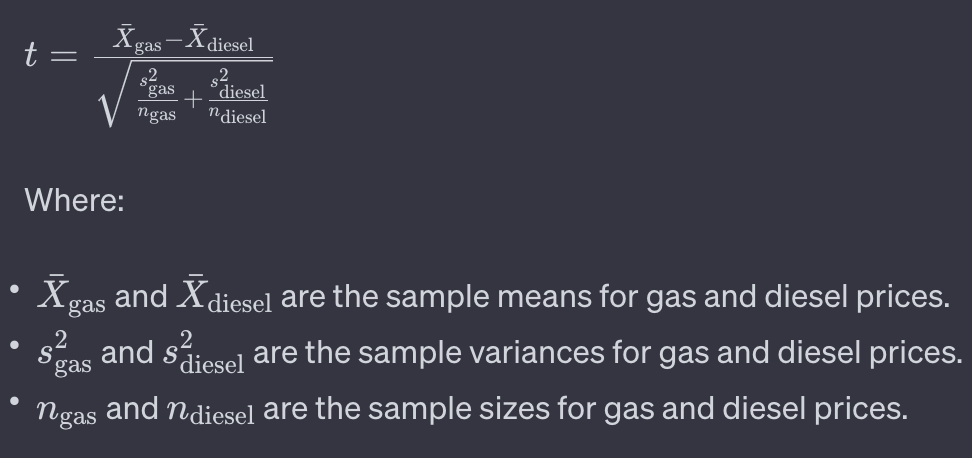

# F-test to check equality of variances as required by t-test

In [ ]:
# F-test for equality of variances
var_test_result <- var.test(price ~ fueltype, data = car_data)

# Print the result
print(var_test_result)


	F test to compare two variances

data:  price by fueltype
F = 0.94454, num df = 19, denom df = 184, p-value = 0.942
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.5235381 2.0584442
sample estimates:
ratio of variances 
           0.94454 



This R code performs an F-test to assess the equality of variances between two groups defined by the 'fueltype' variable in the 'car_data' dataset. Here's the interpretation of the output:

1. **F-test Results:**
   - **F statistic:** 0.94454
   - **Degrees of freedom:** Numerator (num df) = 19, Denominator (denom df) = 184
   - **P-value:** 0.942

2. **Conclusion:**
   - The null hypothesis assumes equal variances (true ratio of variances equals 1).
   - The alternative hypothesis suggests that the true ratio of variances is not equal to 1.

3. **Confidence Interval:**
   - 95% confidence interval for the ratio of variances: 0.5235381 to 2.0584442.

4. **Sample Estimates:**
   - The estimated ratio of variances is 0.94454.

5. **Interpretation:**
   - Since the p-value is high (0.942), we fail to reject the null hypothesis. This suggests that there isn't enough evidence to claim a significant difference in variances between the groups defined by 'fueltype.'

6. **Conclusion:**
   - The variances between the groups are likely to be equal based on the given data and statistical test.
  

# Levene's test to check equality of variances  as required by t-test

In [ ]:
# Assuming your dataframe is named 'df'
library(car)

# Levene's test for equality of variances
levene_test_result <- leveneTest(price ~ fueltype, data = car_data)

# Print the result
print(levene_test_result)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  0.3057  0.581
      203               


This R code utilizes the `leveneTest` function from the 'car' package to perform Levene's test for equality of variances between two groups defined by the 'fueltype' variable in the 'car_data' dataset. Here's the interpretation of the output:

1. **Levene's Test Results:**
   - **Degrees of freedom:** Group (group df) = 1, Error (203 df).
   - **F statistic:** 0.3057
   - **P-value:** 0.581

2. **Conclusion:**
   - The null hypothesis assumes equal variances.
   - The alternative hypothesis suggests that variances are not equal.

3. **Interpretation:**
   - Since the p-value is high (0.581), we fail to reject the null hypothesis. This indicates that, based on Levene's test, there isn't sufficient evidence to claim a significant difference in variances between the groups defined by 'fueltype.'

4. **Conclusion:**
   - The variances between the groups are likely to be equal based on Levene's test and the given data.

# checking normality in fueltype column using QQ-Plot` as required by t-test`

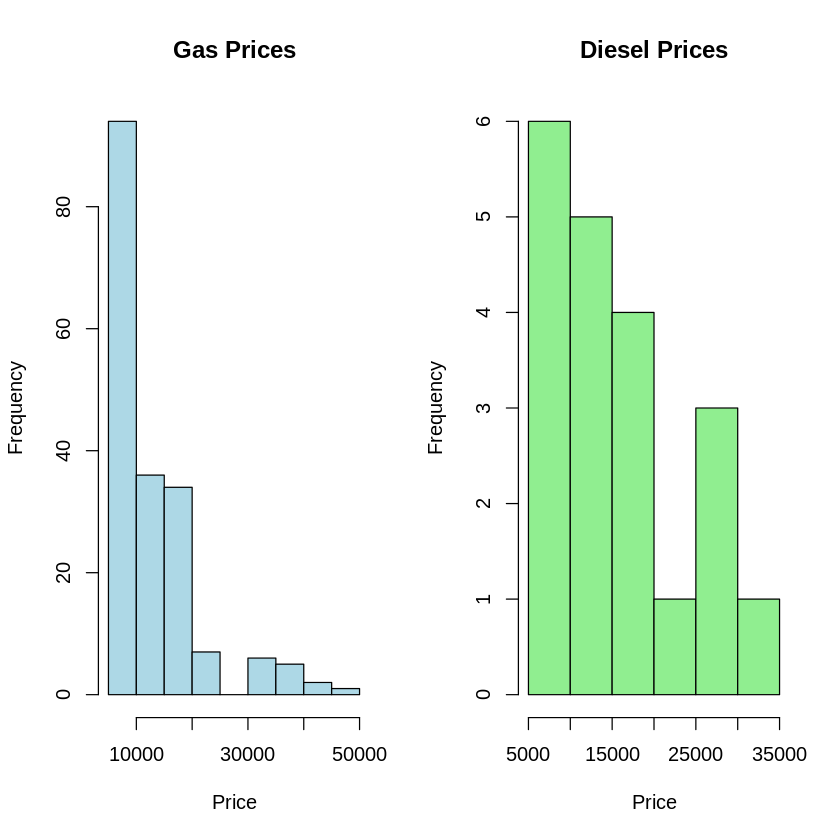

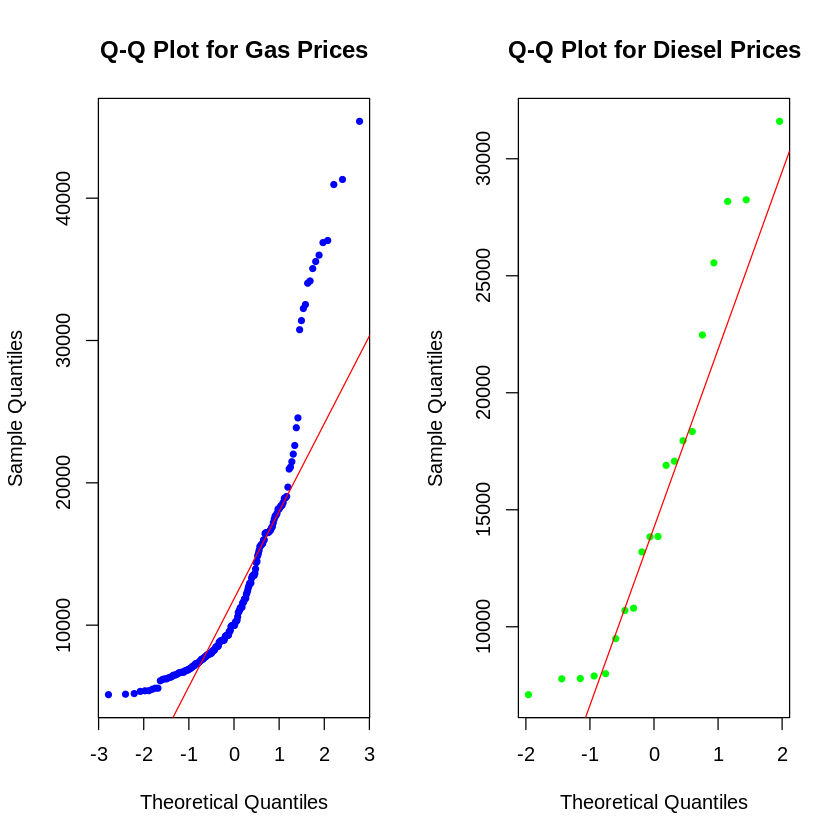

In [ ]:
gas_prices <- car_data$price[car_data$fueltype == "gas"]

diesel_prices <- car_data$price[car_data$fueltype == "diesel"]

# Plot histograms
par(mfrow = c(1, 2))  # Set up a 1x2 grid for side-by-side plots
hist(gas_prices, main = "Gas Prices", xlab = "Price", col = "lightblue", border = "black")
hist(diesel_prices, main = "Diesel Prices", xlab = "Price", col = "lightgreen", border = "black")

# Plot Q-Q plots
qqnorm(gas_prices, main = "Q-Q Plot for Gas Prices", col = "blue", pch = 20)
qqline(gas_prices, col = "red")
qqnorm(diesel_prices, main = "Q-Q Plot for Diesel Prices", col = "green", pch = 20)
qqline(diesel_prices, col = "red")

# Reset the plotting layout
par(mfrow = c(1, 1))

# Performing actual t-test for hypothesis 1A

In [ ]:
fueltype_counts <- table(car_data$fueltype)

print(fueltype_counts)


diesel    gas 
    20    185 


In [ ]:
t_test_result <- t.test(price ~ fueltype, data = car_data)

print(t_test_result)


	Welch Two Sample t-test

data:  price by fueltype
t = 1.5495, df = 23.566, p-value = 0.1346
alternative hypothesis: true difference in means between group diesel and group gas is not equal to 0
95 percent confidence interval:
 -945.9072 6622.6108
sample estimates:
mean in group diesel    mean in group gas 
            15838.15             12999.80 



This R code conducts a Welch Two Sample t-test to compare the means between two groups defined by the 'fueltype' variable ('diesel' and 'gas') in the 'car_data' dataset. Here's the interpretation of the output:

1. *Welch Two Sample t-test Results:*
   - *T statistic:* 1.5495
   - *Degrees of freedom:* 23.566
   - *P-value:* 0.1346

2. *Conclusion:*
   - The null hypothesis assumes equal means between the groups.
   - The alternative hypothesis suggests that the true difference in means between 'diesel' and 'gas' groups is not equal to zero.

3. *Confidence Interval:*
   - 95% confidence interval for the difference in means: -945.9072 to 6622.6108.

4. *Sample Estimates:*
   - Mean in group 'diesel': $15,838.15
   - Mean in group 'gas': $12,999.80

5. *Interpretation:*
   - Since the p-value is 0.1346, which is greater than a typical significance level like 0.05, we fail to reject the null hypothesis. There isn't enough evidence to claim a significant difference in means between 'diesel' and 'gas' groups based on the given data and t-test.

6. *Conclusion:*
   - The means between the 'diesel' and 'gas' groups are not significantly different at the chosen significance level.

# Checking distribution of car prices by fueltype using box-plots

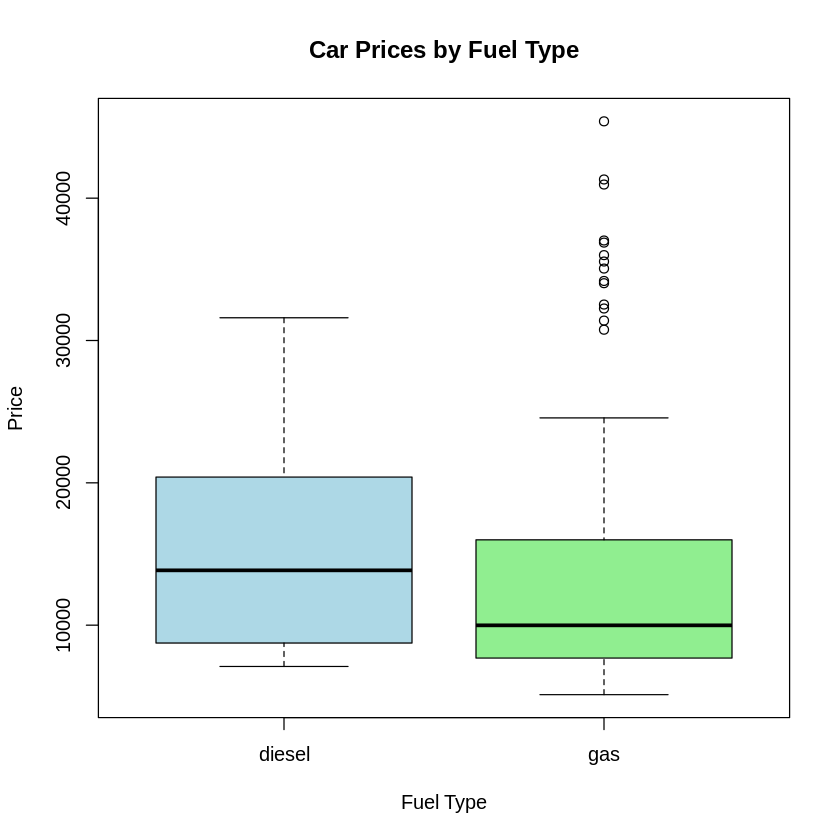

In [ ]:
boxplot(price ~ fueltype, data = car_data, col = c("lightblue", "lightgreen"), main = "Car Prices by Fuel Type", xlab = "Fuel Type", ylab = "Price")

# Hypothesis 1B

- Hypothesis Test for Engine Type:

  - Null Hypothesis (H0): There is no significant difference in the average car prices across different engine types.

    - μ_dohc = μ_dohcv = μ_l = μ_ohc = μ_ohcf = μ_ohcv = μ_rotor

  - Alternate Hypothesis (H1): There is a significant difference in the average car prices across different engine types.

    - At least one μ_i is different, where i represents each engine type.

- Statistical Test:
  - One-way Analysis of Variance (ANOVA)

- Assumptions:
  - Normality of Data:
    - The prices for cars with different engine types should follow approximately normal distributions. You can check this assumption visually using histograms or quantile-quantile (Q-Q) plots.

  - Equality of Variances (Homogeneity of Variances):
    - The variances of car prices should be approximately equal across different engine types. You can check this assumption using statistical tests like Levene's test.

  - Random Sampling:

    - The data should be collected through a random sampling process to ensure that the sample is representative of the population.

- Test Statistic:
  - The test statistic for one-way ANOVA is calculated as follows:

    - F= (Between-group variability / (Within-group variability)


# Checking unique values and count of enginetype column

In [ ]:
enginetype_counts <- table(car_data$enginetype)

# Print the counts
print(enginetype_counts)


 dohc dohcv     l   ohc  ohcf  ohcv rotor 
   12     1    12   148    15    13     4 


# Performing levene's test to check equality of variances as required an assumption by ANOVA

In [ ]:
# Assuming 'car_data' is your data frame with columns 'car_prices' and 'enginetype'
library(car)

# Perform Levene's test
levene_test_result <- leveneTest(car_data$price, car_data$enginetype)

# Output the results
print(levene_test_result)

Warning message in leveneTest.default(car_data$price, car_data$enginetype):
“car_data$enginetype coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
       Df F value  Pr(>F)  
group   6  2.0913 0.05584 .
      198                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


The above output shows the results of Levene's Test for Homogeneity of Variance with a warning message. Here's the interpretation:


1. Levene's Test Results:

  - Degrees of freedom: Group (group df) = 6, Error (198 df).
  - F statistic: 2.0913
  - P-value: 0.05584

2. Hypothesis:

  - The null hypothesis assumes equal variances.
  - The alternative hypothesis suggests that variances are not equal.

3. Significance Codes:

  - The '.' next to the p-value indicates that the test is marginally significant at a 0.1 significance level.

4. Interpretation:
   - Since the p-value is high (0.05584), we fail to reject the null hypothesis. This indicates that, based on Levene's test, there isn't sufficient evidence to claim a significant difference in variances between the groups defined by 'fueltype.'

5. Conclusion:
   - The variances between the groups are likely to be equal based on Levene's test and the given data.

# Checking normality in enginetype column as required by ANOVA

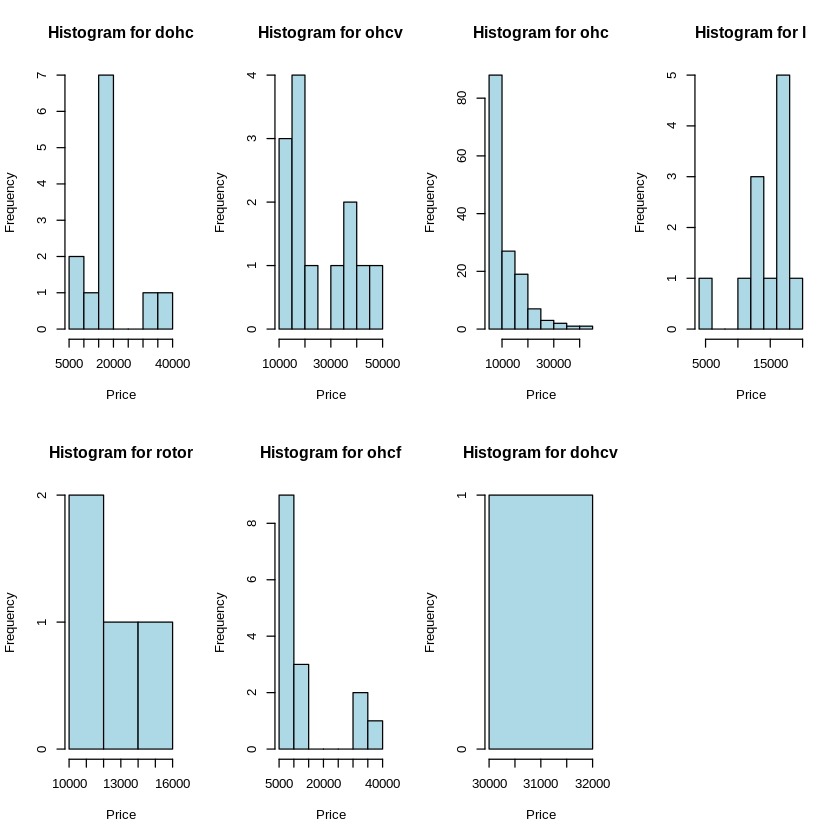

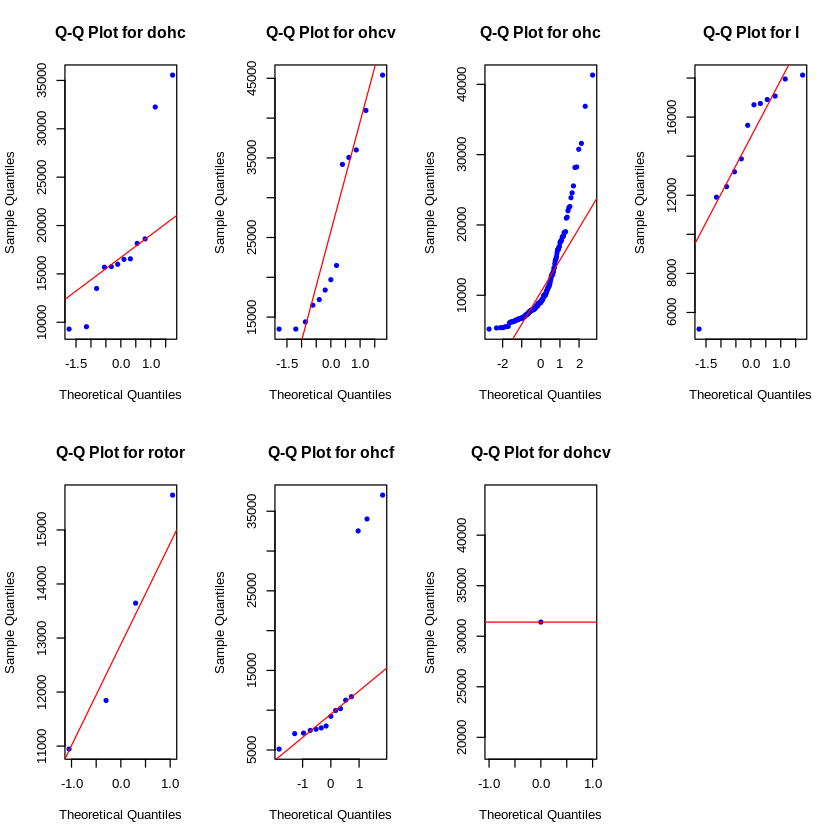

In [ ]:
# Create histograms for each engine type
par(mfrow = c(2, 4))  # Set up a 2x4 grid for subplots
unique_engine_types <- unique(car_data$enginetype)

for (engine_type in unique_engine_types) {
  subset_prices <- car_data$price[car_data$enginetype == engine_type]
  hist(subset_prices, main = paste("Histogram for", engine_type), xlab = "Price", col = "lightblue", border = "black")
}

# Reset the plotting layout
par(mfrow = c(1, 1))

# Create Q-Q plots for each engine type
par(mfrow = c(2, 4))  # Set up a 2x4 grid for subplots

for (engine_type in unique_engine_types) {
  subset_prices <- car_data$price[car_data$enginetype == engine_type]
  qqnorm(subset_prices, main = paste("Q-Q Plot for", engine_type), col = "blue", pch = 20)
  qqline(subset_prices, col = "red")
}

# Reset the plotting layout
par(mfrow = c(1, 1))

# Performing actual ANOVA test for hypothesis 1B

In [ ]:
# Perform ANOVA
anova_result <- aov(price ~ enginetype, data = car_data)

# Summary of ANOVA
summary(anova_result)

# Check the significance level
alpha <- 0.05

             Df    Sum Sq   Mean Sq F value   Pr(>F)    
enginetype    6 2.881e+09 480123861   9.376 4.69e-09 ***
Residuals   198 1.014e+10  51206546                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

This R output shows the results of an Analysis of Variance (ANOVA) test for the variable 'price' across different levels of the 'enginetype' variable. Here's the interpretation:

1. ANOVA Table:
  - Df (Degrees of Freedom): There are two rows in the table. The first row is for 'enginetype' with 6 degrees of freedom, and the second row is for residuals with 198 degrees of freedom.

  - Sum Sq (Sum of Squares): This represents the sum of squared differences between the observed values and the group means. For 'enginetype,' it is 2.881e+09, and for residuals, it is 1.014e+10.

  - Mean Sq (Mean Square): The sum of squares divided by the degrees of freedom. For 'enginetype,' it is 480123861, and for residuals, it is 51206546.

  - F value: The ratio of the mean square for 'enginetype' to the mean square for residuals. In this case, it is 9.376.

  - Pr(>F): The p-value associated with the F value. It is very small, denoted as 4.69e-09, indicating strong evidence against the null hypothesis.

2. Conclusion:

  - The null hypothesis in ANOVA assumes that all group means are equal. The alternative hypothesis is that at least one group mean is different.

  - The p-value (Pr(>F)) is extremely small (4.69e-09), much less than the significance level of 0.05.

3. Significance Codes:

  - The '***' next to the p-value indicates that the test is highly significant.

4. Interpretation:

  - With such a low p-value, you would reject the null hypothesis. There is strong evidence to suggest that there are significant differences in the mean 'price' among different levels of 'enginetype.'

5. Conclusion:

  - The 'enginetype' variable has a statistically significant effect on the 'price' variable, according to the ANOVA results.

# Checking distribution of car prices by enginetype using box-plots

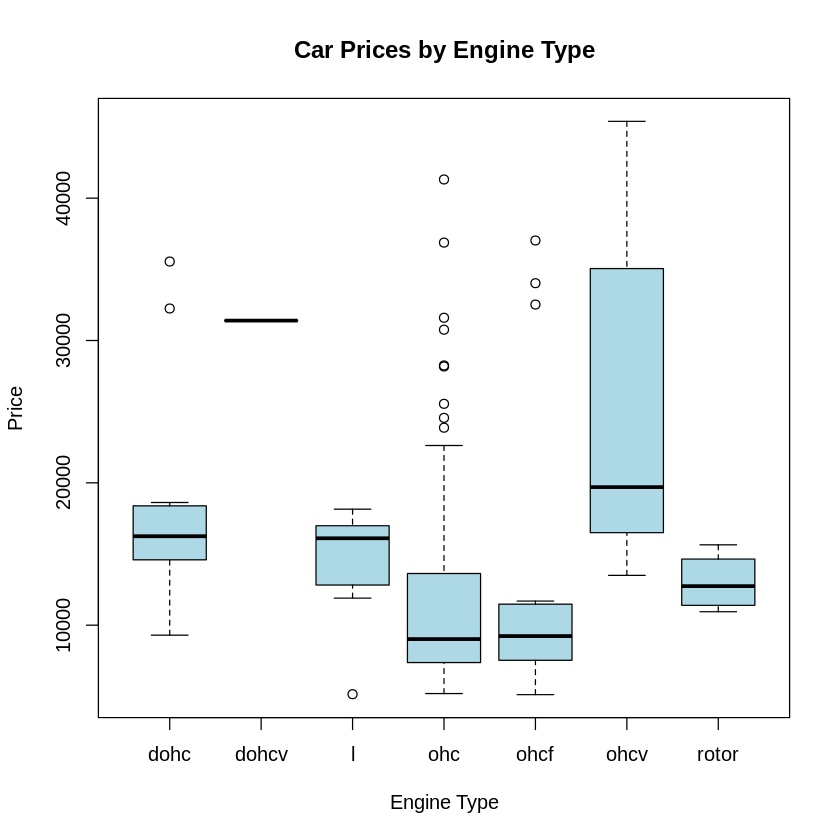

In [ ]:
# Assuming 'car_data' is your data frame with columns 'price' and 'enginetype'
boxplot(price ~ enginetype, data = car_data, col = "lightblue", main = "Car Prices by Engine Type", xlab = "Engine Type", ylab = "Price")

# Hypothesis 1 C



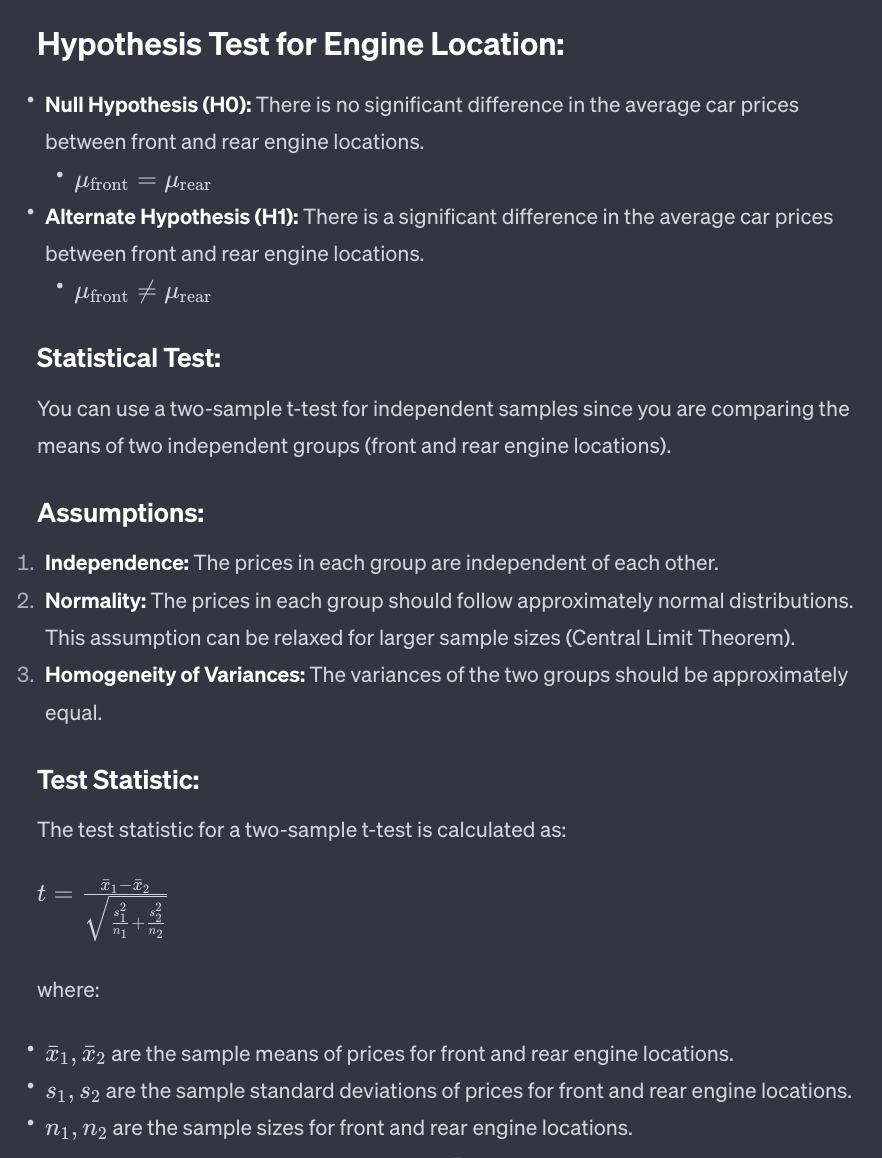

In [ ]:
enginelocation_counts <- table(car_data$enginelocation)

# Print the counts
print(enginelocation_counts)


front  rear 
  202     3 


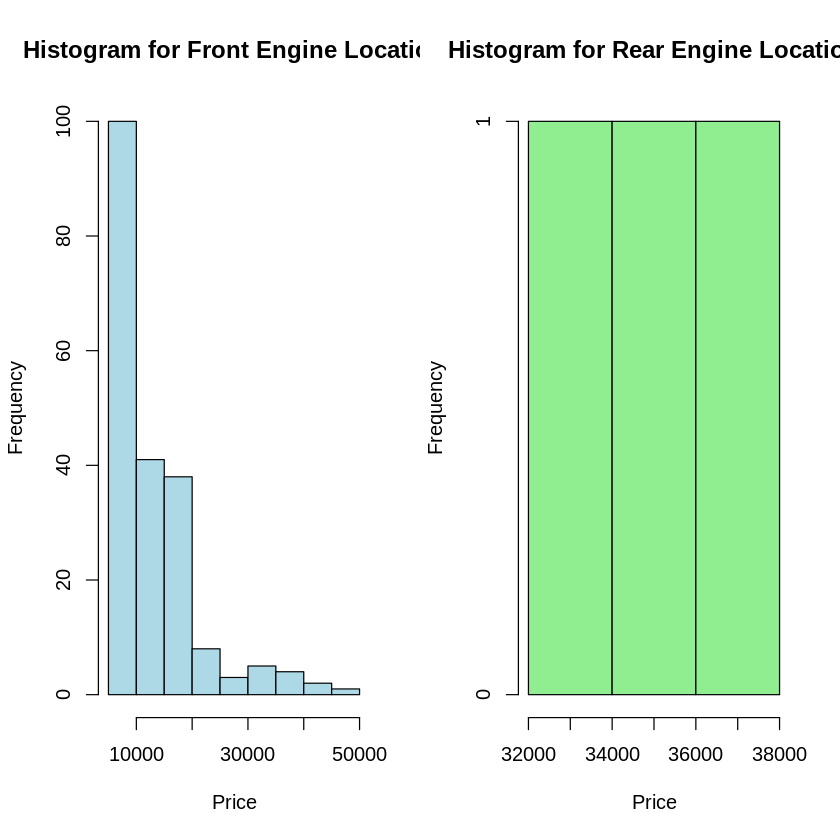

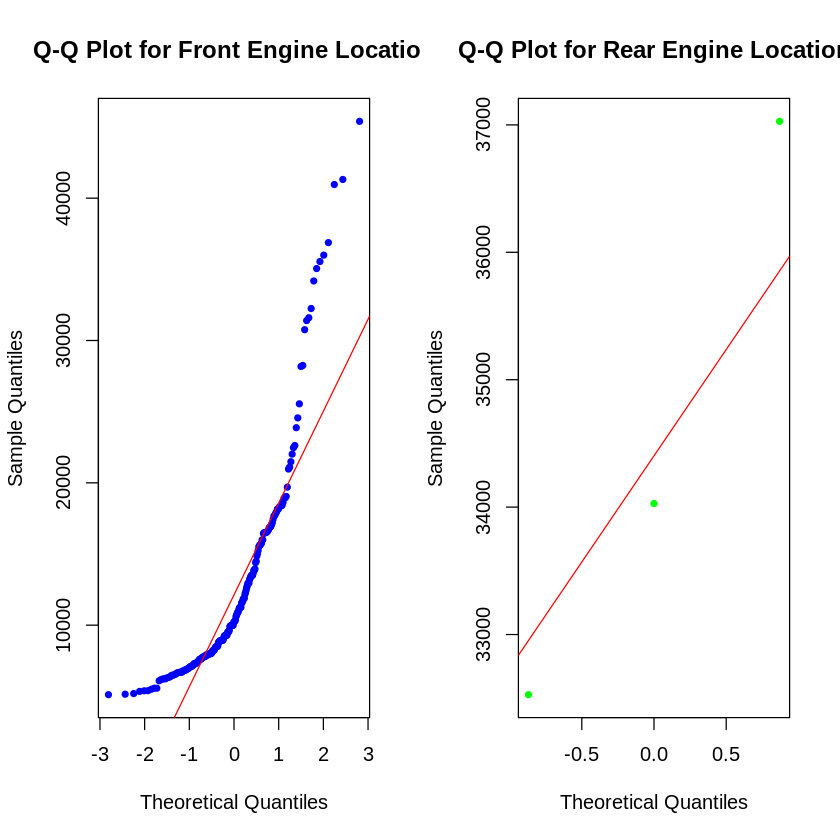

In [ ]:
# Assuming 'car_data' is your data frame with columns 'price' and 'enginelocation'

# Set up a 1x2 grid for subplots
par(mfrow = c(1, 2))

# Create histograms for each engine location
hist(car_data$price[car_data$enginelocation == "front"], main = "Histogram for Front Engine Location", xlab = "Price", col = "lightblue", border = "black")
hist(car_data$price[car_data$enginelocation == "rear"], main = "Histogram for Rear Engine Location", xlab = "Price", col = "lightgreen", border = "black")

# Create Q-Q plots for each engine location
qqnorm(car_data$price[car_data$enginelocation == "front"], main = "Q-Q Plot for Front Engine Location", col = "blue", pch = 20)
qqline(car_data$price[car_data$enginelocation == "front"], col = "red")
qqnorm(car_data$price[car_data$enginelocation == "rear"], main = "Q-Q Plot for Rear Engine Location", col = "green", pch = 20)
qqline(car_data$price[car_data$enginelocation == "rear"], col = "red")

# Reset the plotting layout
par(mfrow = c(1, 1))

In [ ]:
# Assuming 'car_data' is your data frame with columns 'car_prices' and 'enginelocation'
library(car)

# Perform Levene's test
levene_test_result <- leveneTest(car_data$price, car_data$enginelocation)

# Output the results
print(levene_test_result)

Warning message in leveneTest.default(car_data$price, car_data$enginelocation):
“car_data$enginelocation coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  1.0797    0.3
      203               


This R output shows the results of Levene's Test for Homogeneity of Variance with a warning message. Here's the interpretation:

1. Warning Message:

  - The warning message indicates that the 'enginelocation' variable was coerced to a factor. This typically happens when the variable is not explicitly defined as a factor, but the test requires it to be.

2. Levene's Test Results:

  - Degrees of freedom: Group (group df) = 1, Error (203 df).
  - F statistic: 1.0797
  - P-value: 0.3

3. Conclusion:

  - The null hypothesis assumes equal variances.
  - The alternative hypothesis suggests that variances are not equal.

4. Interpretation:

  - The p-value is 0.3, which is greater than the commonly used significance level of 0.05. This suggests that there is not enough evidence to reject the null hypothesis of equal variances.

5. Conclusion:

  - Based on the p-value, there is no significant evidence to suggest that the variances between groups (represented by 'enginelocation') are different. The result is not statistically significant at the 0.05 significance level.

6. Note on Warning Message:

  - The warning message indicates that 'enginelocation' was coerced to a factor. While this might not affect the results of the test, it's a good practice to ensure that categorical variables are appropriately defined as factors when conducting statistical tests.

In [ ]:
# Assuming 'car_data' is your data frame with columns 'price' and 'enginelocation'

# Subset data for front engine location
front_prices <- car_data$price[car_data$enginelocation == "front"]

# Subset data for rear engine location
rear_prices <- car_data$price[car_data$enginelocation == "rear"]

# Perform two-sample t-test
t_test_result <- t.test(front_prices, rear_prices)

# Print the result
print(t_test_result)


	Welch Two Sample t-test

data:  front_prices and rear_prices
t = -15.113, df = 2.7079, p-value = 0.001079
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -26398.67 -16735.13
sample estimates:
mean of x mean of y 
  12961.1   34528.0 



This R output shows the results of a Welch Two Sample t-test comparing the means of two groups: 'front_prices' and 'rear_prices,' which are subsets of 'price' based on the 'enginelocation' variable. Here's the interpretation:

1. Welch Two Sample t-test Results:

  - T statistic: -15.113
  - Degrees of freedom: 2.7079
  - P-value: 0.001079

2. Conclusion:

  - The null hypothesis assumes equal means between the two groups.
  - The alternative hypothesis suggests that the true difference in means between 'front_prices' and 'rear_prices' is not equal to zero.

3. Confidence Interval:

  - 95% confidence interval for the difference in means: -26398.67 to -16735.13.

4. Sample Estimates:

  - Mean of 'front_prices': 12961.1
  - Mean of 'rear_prices': 34528.0

5. Interpretation:

  - The low p-value of 0.001079 suggests strong evidence against the null hypothesis. Therefore, you would reject the null hypothesis of equal means.

6. Conclusion:

  - The result indicates a significant difference in means between the 'front_prices' and 'rear_prices' groups. The negative t-value and the confidence interval suggest that 'rear_prices' tend to be significantly higher than 'front_prices.'

# Hypothesis 2 MLR

# Data exploration for selecting the best predictors

# First working on selecting the best continous variables

# Correlation analysis using correlation matrix

In [ ]:
# Load the necessary library
library(tidyverse)

# Select numeric columns for correlation analysis
numeric_columns <- car_data %>%
  select_if(is.numeric)

# Compute the pairwise correlation matrix
correlation_matrix <- cor(numeric_columns)

correlation_matrix

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.00000000,-0.151621137,0.1297288,0.1706364,0.05238661,0.25596004,0.07196156,-0.03392984,0.260063680,-0.160823619,0.150275906,-0.01500557,-0.20378920,0.01594004,0.01125532,-0.10909334
symboling,-0.15162114,1.000000000,-0.5319537,-0.3576115,-0.23291906,-0.54103820,-0.22769059,-0.10578971,-0.130051360,-0.008735141,-0.178515084,0.07087272,0.27360625,-0.03582263,0.03460600,-0.07997822
wheelbase,0.12972878,-0.531953682,1.0000000,0.8745875,0.79514364,0.58943476,0.77638633,0.56932868,0.488749875,0.160959047,0.249785845,0.35329448,-0.36046875,-0.47041361,-0.54408192,0.57781560
carlength,0.17063639,-0.357611523,0.8745875,1.0000000,0.84111827,0.49102946,0.87772846,0.68335987,0.606454358,0.129532611,0.158413706,0.55262297,-0.28724220,-0.67090866,-0.70466160,0.68292002
carwidth,0.05238661,-0.232919061,0.7951436,0.8411183,1.00000000,0.27921032,0.86703246,0.73543340,0.559149909,0.182941693,0.181128627,0.64073208,-0.22001230,-0.64270434,-0.67721792,0.75932530
carheight,0.25596004,-0.541038200,0.5894348,0.4910295,0.27921032,1.00000000,0.29557173,0.06714874,0.171070922,-0.055306674,0.261214226,-0.10880206,-0.32041072,-0.04863963,-0.10735763,0.11933623
curbweight,0.07196156,-0.227690588,0.7763863,0.8777285,0.86703246,0.29557173,1.00000000,0.85059407,0.648479749,0.168790035,0.151361740,0.75073925,-0.26624318,-0.75741378,-0.79746479,0.83530488
enginesize,-0.03392984,-0.105789709,0.5693287,0.6833599,0.73543340,0.06714874,0.85059407,1.00000000,0.583774327,0.203128588,0.028971360,0.80976865,-0.24465983,-0.65365792,-0.67746991,0.87414480
boreratio,0.26006368,-0.130051360,0.4887499,0.6064544,0.55914991,0.17107092,0.64847975,0.58377433,1.000000000,-0.055908983,0.005197339,0.57367682,-0.25497553,-0.58453172,-0.58701178,0.55317324
stroke,-0.16082362,-0.008735141,0.1609590,0.1295326,0.18294169,-0.05530667,0.16879004,0.20312859,-0.055908983,1.000000000,0.186110110,0.08093954,-0.06796375,-0.04214475,-0.04393093,0.07944308


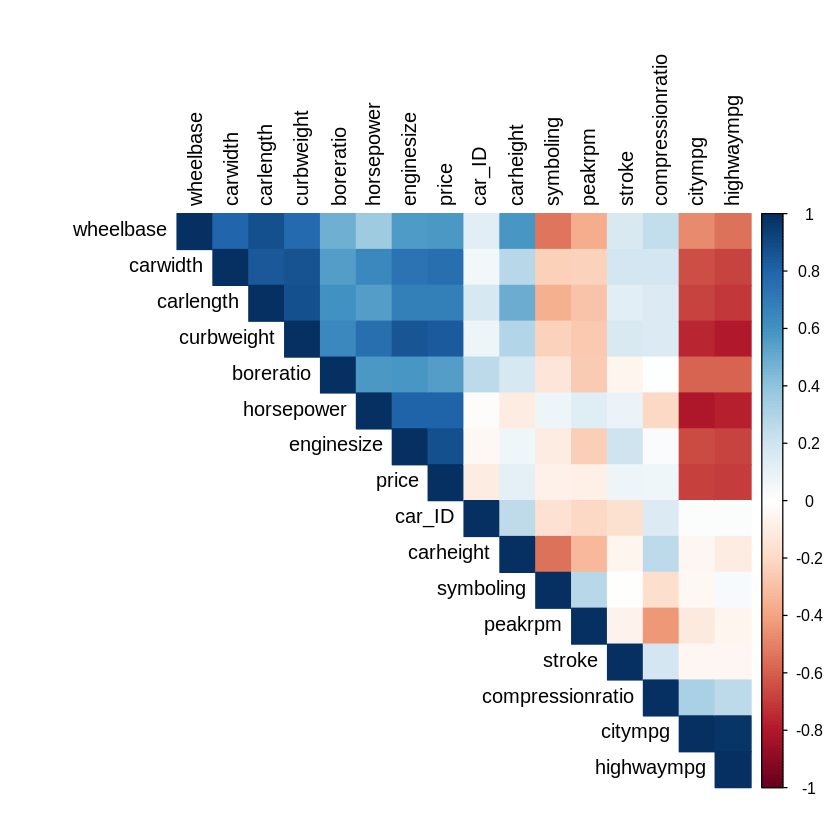

In [ ]:
# Load the necessary library for visualization
library(corrplot)

# Create a heatmap of the correlation matrix
corrplot(correlation_matrix, method = "color", type = "upper", order = "hclust", tl.col = "black")

In [ ]:
# Extract correlation coefficients for 'price'
correlation_with_price <- correlation_matrix[,"price"]

# Display variables with high absolute correlation coefficients
high_correlation_vars <- names(which(abs(correlation_with_price) > 0.55))  # Adjust the threshold as needed
high_correlation_vars

[1] "wheelbase"  "carlength"  "carwidth"   "curbweight" "enginesize"
 [6] "boreratio"  "horsepower" "citympg"    "highwaympg" "price"

- It is observed from the correlation matrix that variables such as 'wheelbase,' 'carlength,' 'carwidth,' 'curbweight,' 'enginesize,' 'boreratio,' 'horsepower,' 'citympg,' 'highwaympg,' and 'price' exhibit a strong correlation with the dependent variable 'price.' This suggests that these features may serve as robust indicators of the 'price' variable, highlighting their potential significance in predicting and understanding the pricing dynamics of the dataset.

In [ ]:
corr_mpg <- cor(car_data$citympg , car_data$highwaympg)
corr_mpg

[1] 0.971337

- The correlation analysis reveals that the correlation coefficient between 'citympg' and 'highwaympg' is nearly equal to 1. This high degree of correlation indicates a strong linear relationship between these two variables. As a result, it is advisable to consider either 'citympg' or 'highwaympg' in predictive modeling or analyses to avoid issues associated with multicollinearity, as including both may not provide additional meaningful information due to their redundancy.

- Also the citympg and highwaympg is highly correlated to features like carwidth and weight. So to avoid redundance we skip both these columns

# Scatter plot analysis

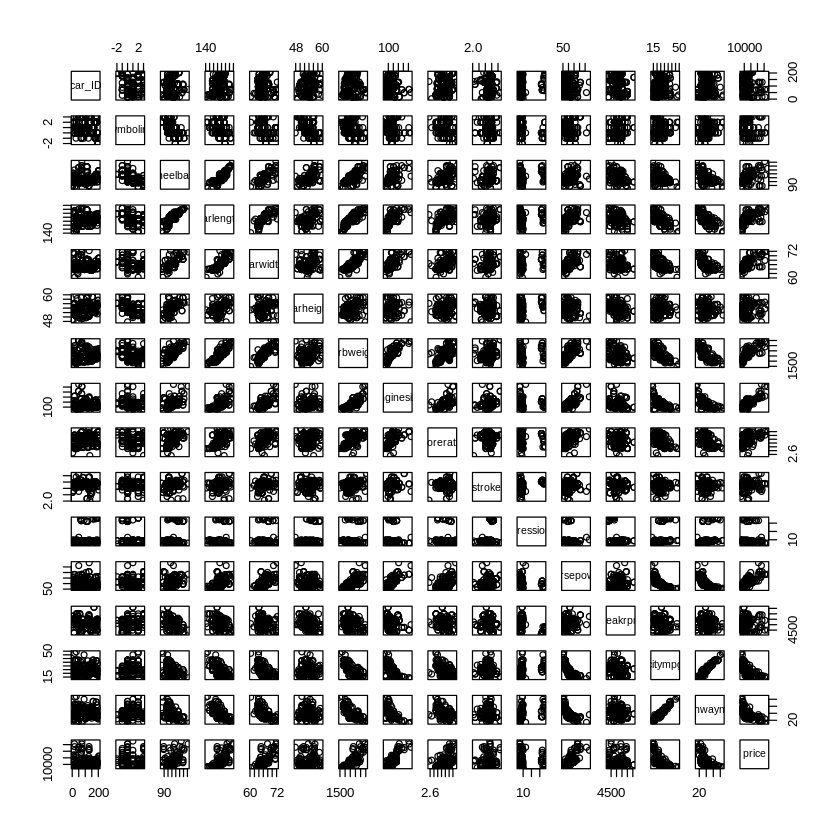

In [ ]:
# Select numeric columns for scatter plots
numeric_columns <- car_data %>%
  select_if(is.numeric)

# Create scatter plots
pairs(numeric_columns)

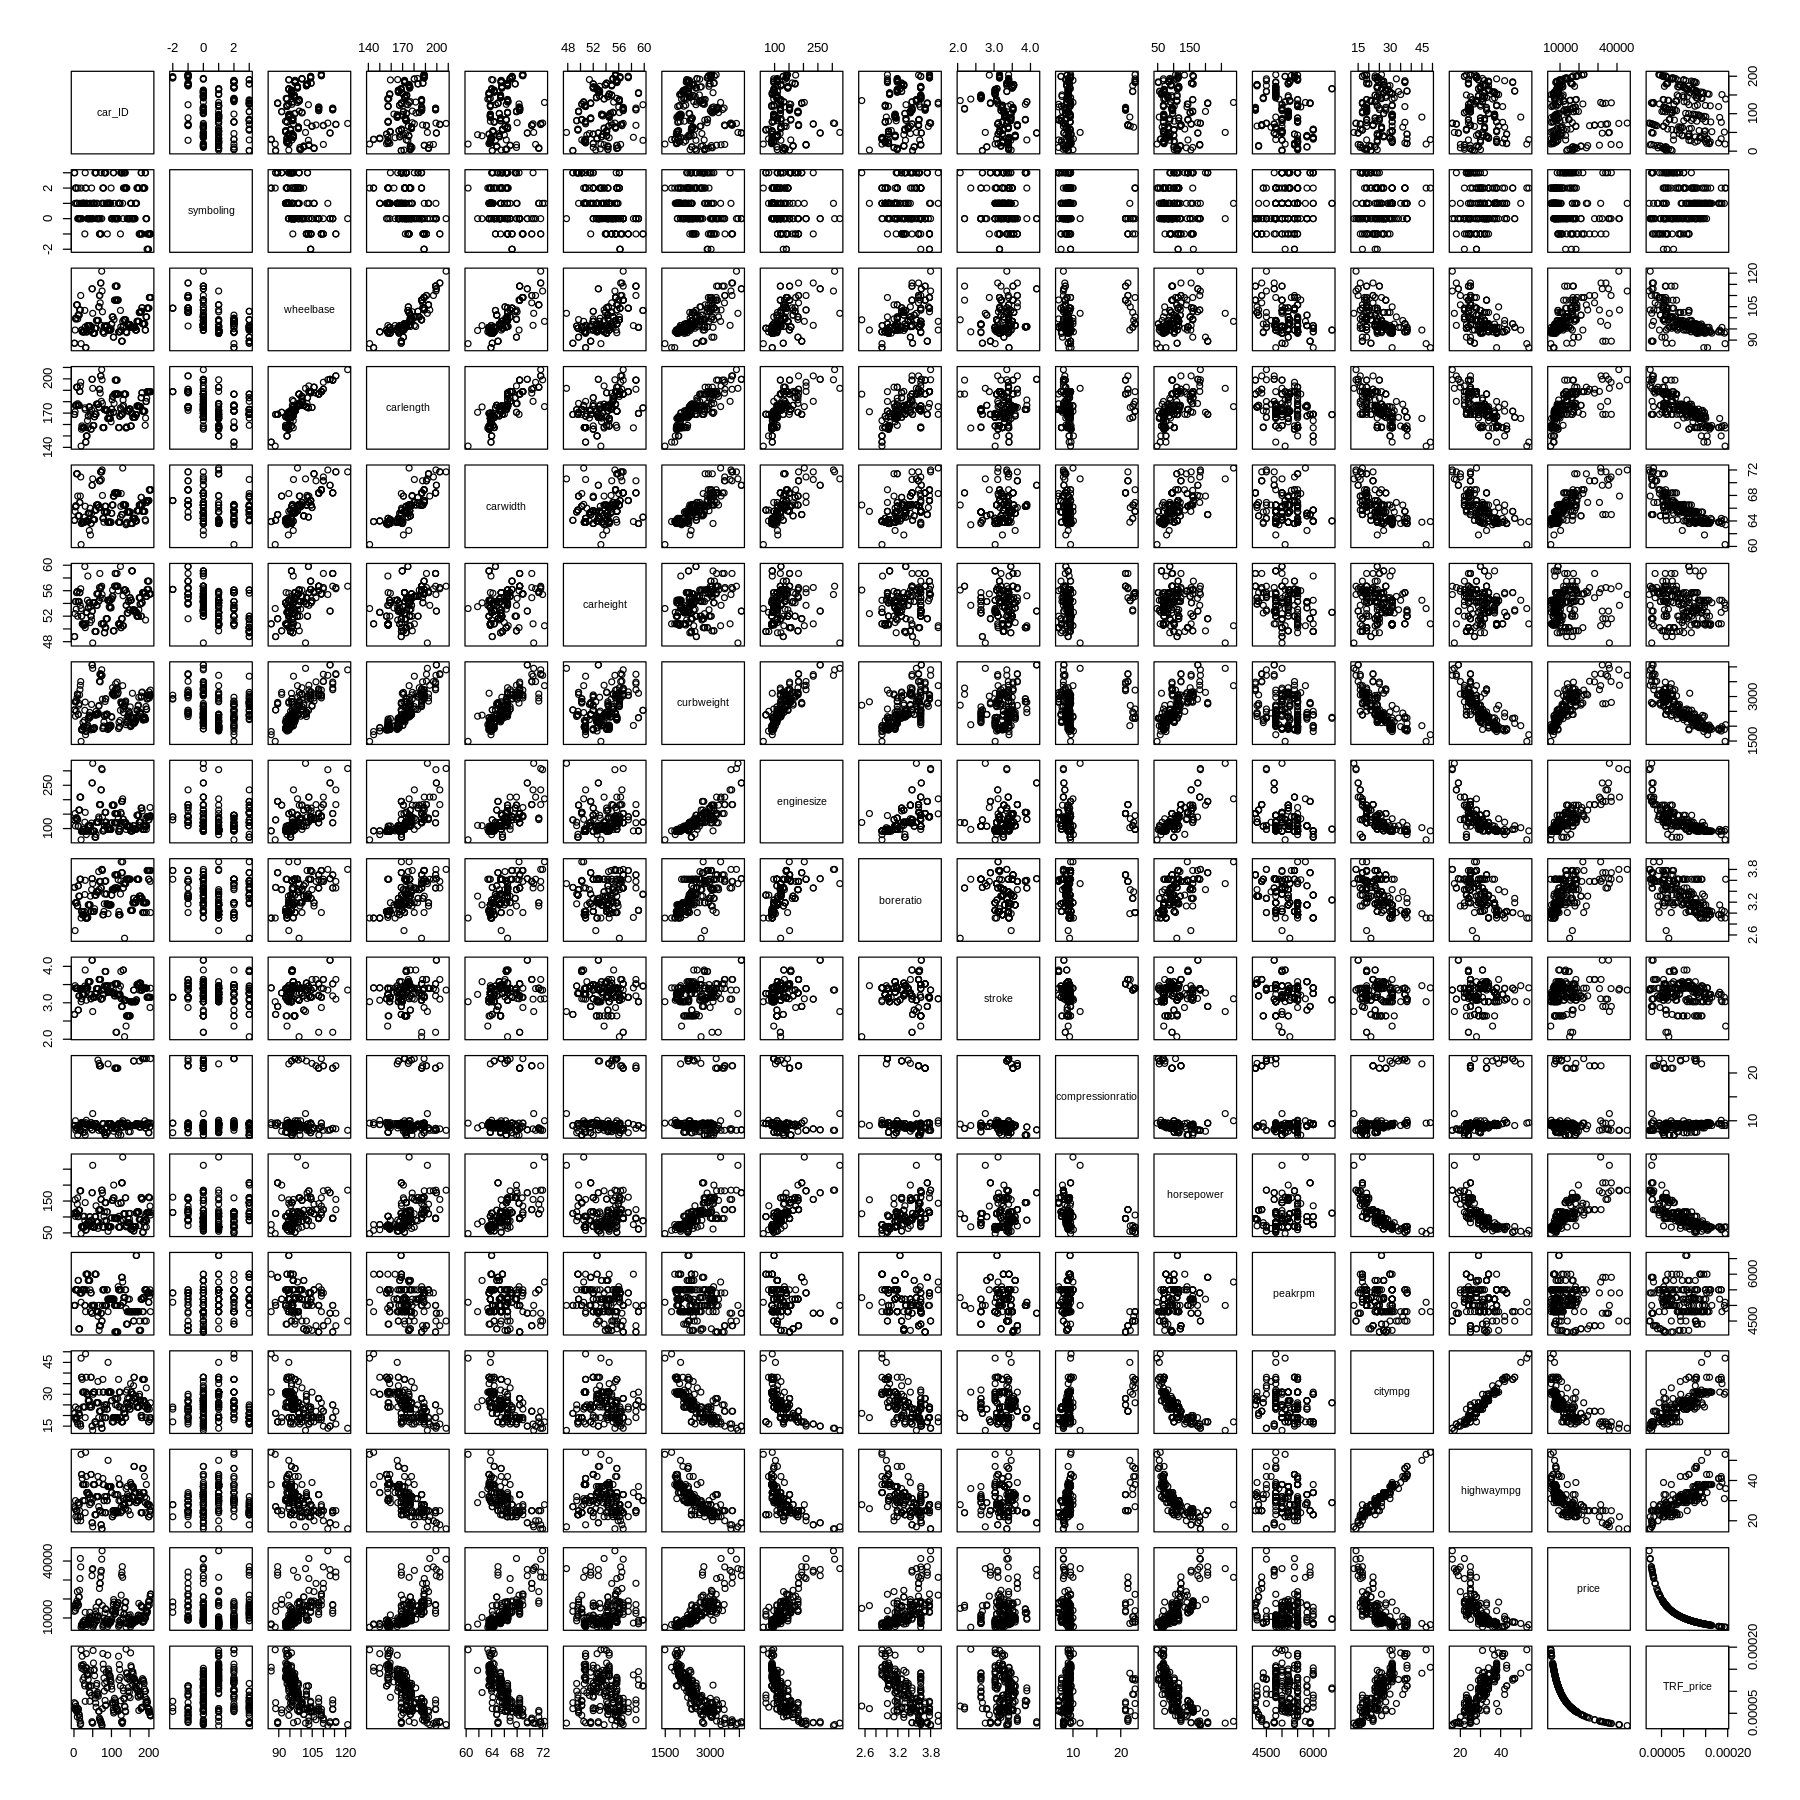

In [ ]:
# Load necessary libraries
library(ggplot2)

# Set the size of the plot
options(repr.plot.width=15, repr.plot.height=15)

# Select numeric columns for scatter plots
numeric_columns <- car_data %>%
  select_if(is.numeric)

# Create scatter plots
pairs(numeric_columns, cex = 1)

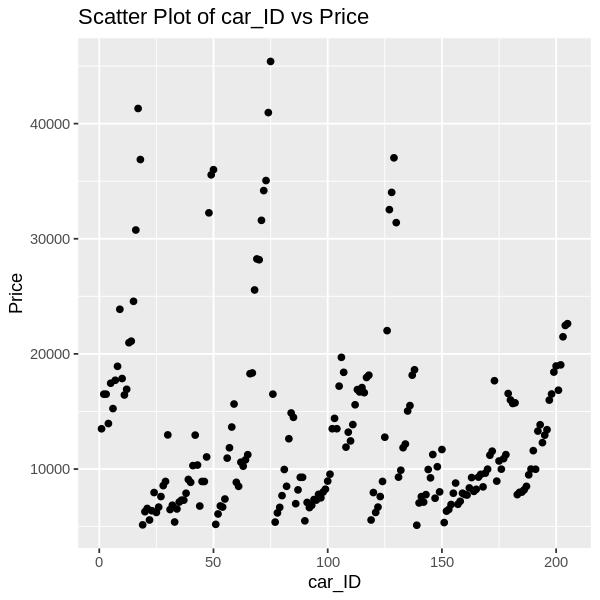

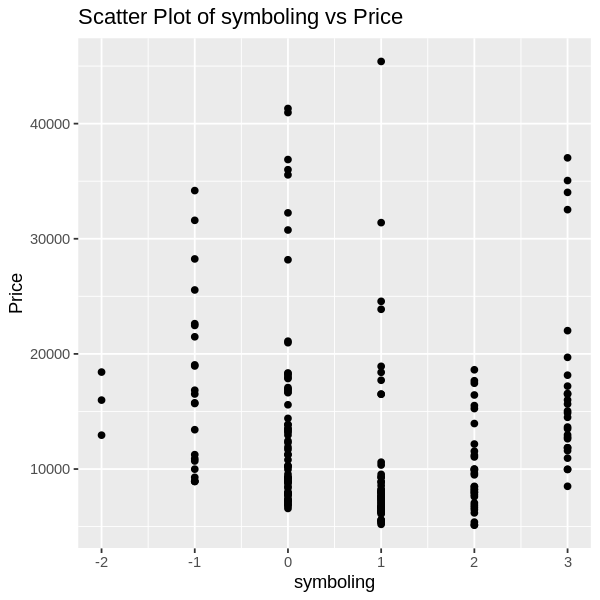

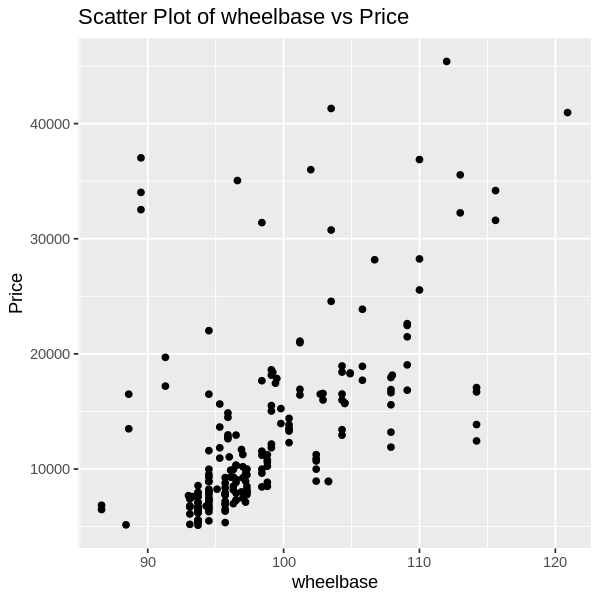

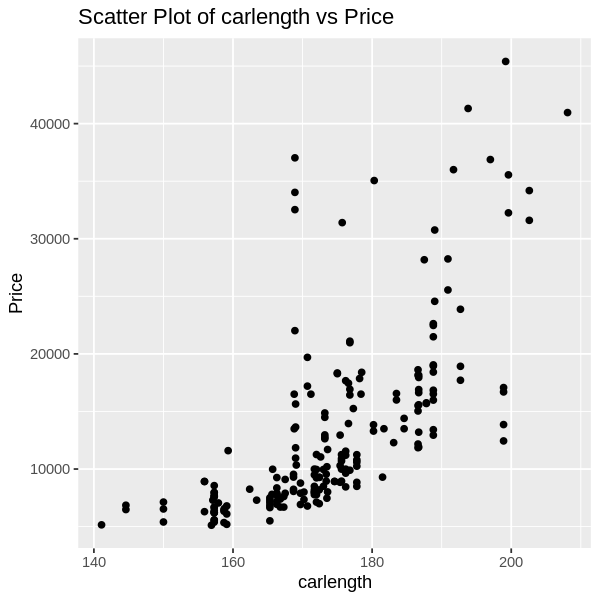

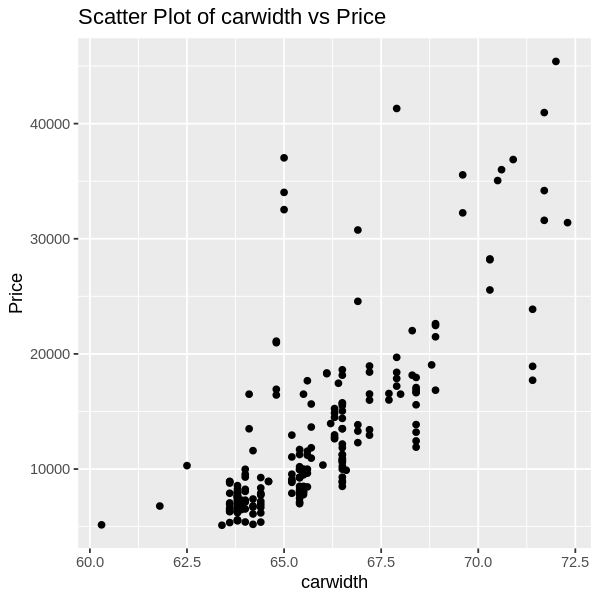

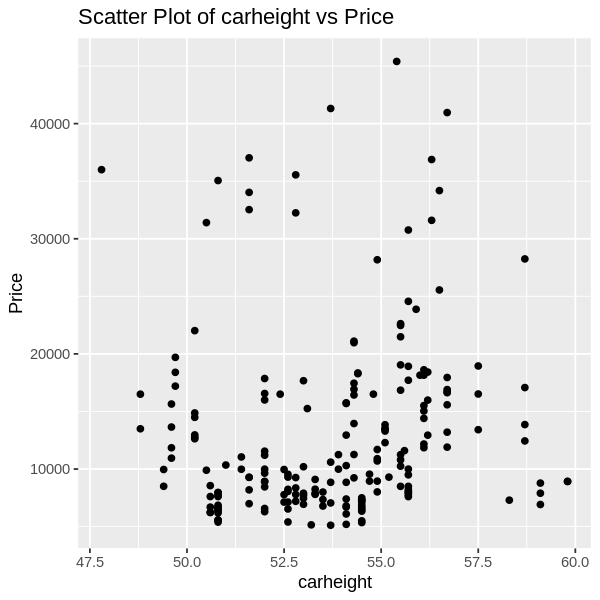

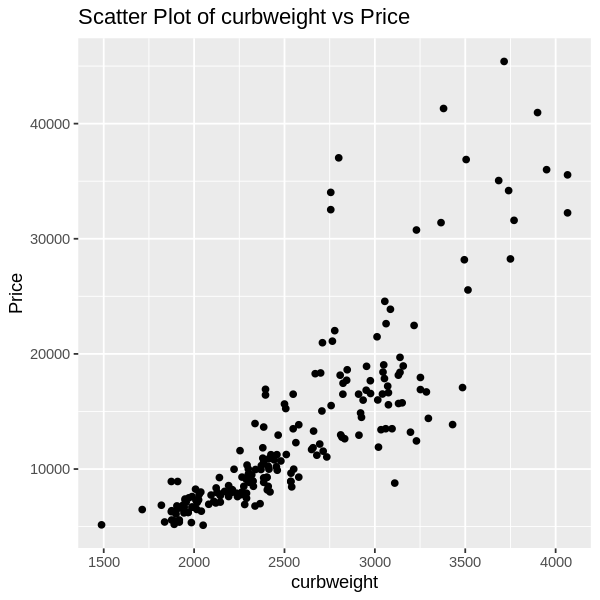

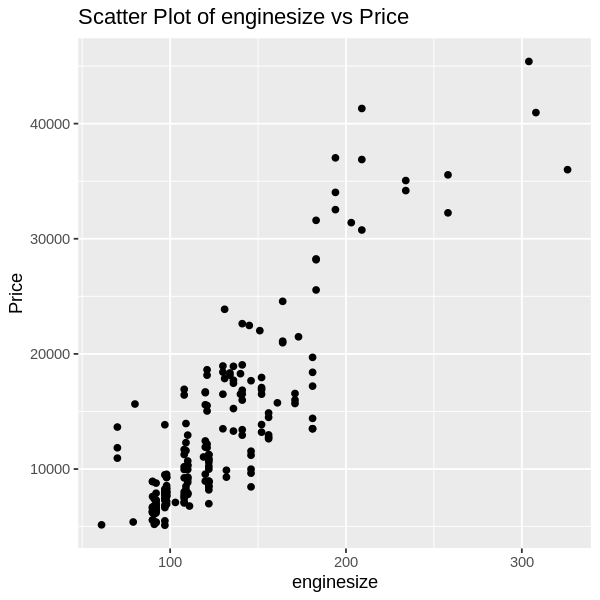

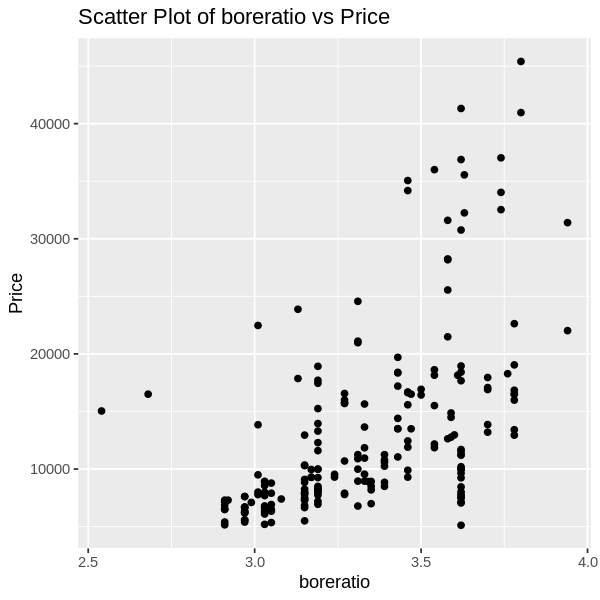

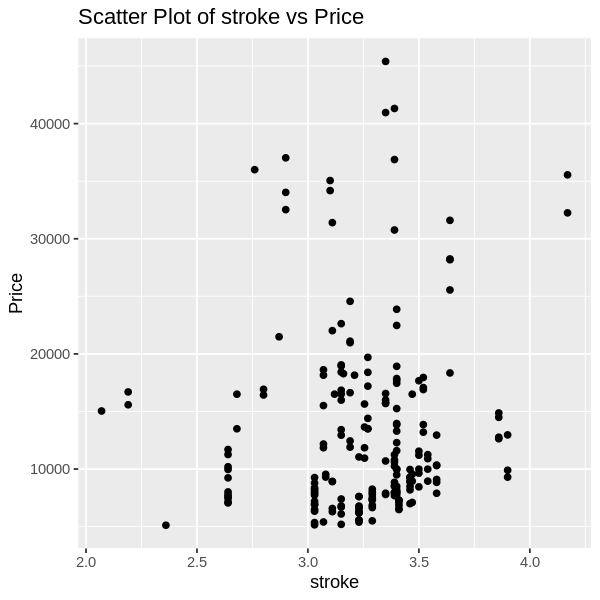

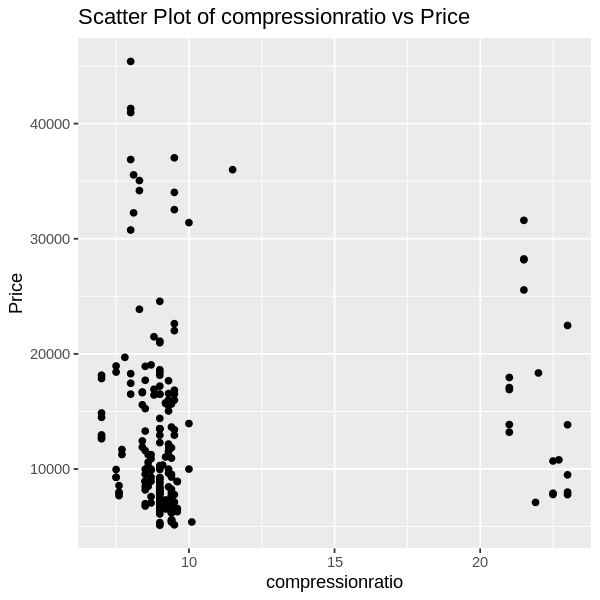

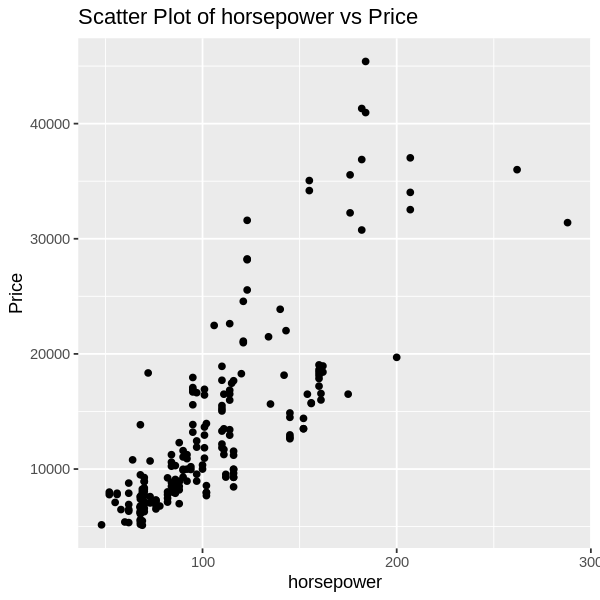

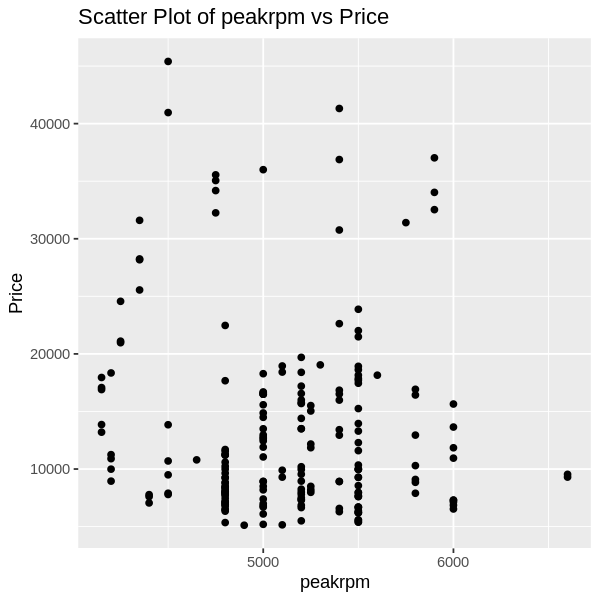

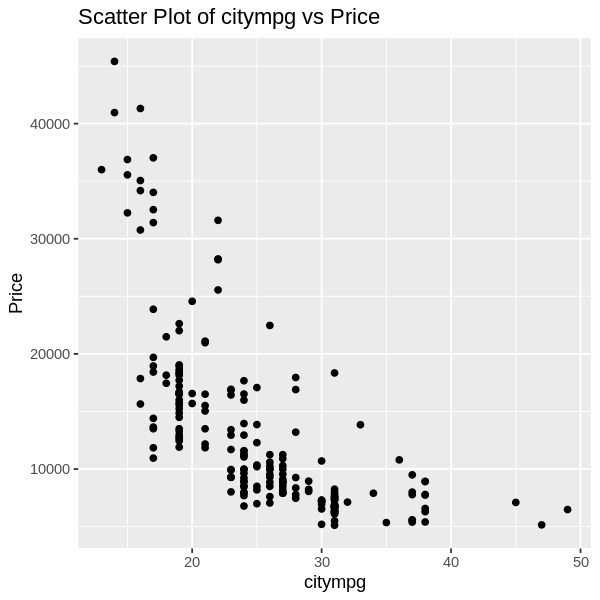

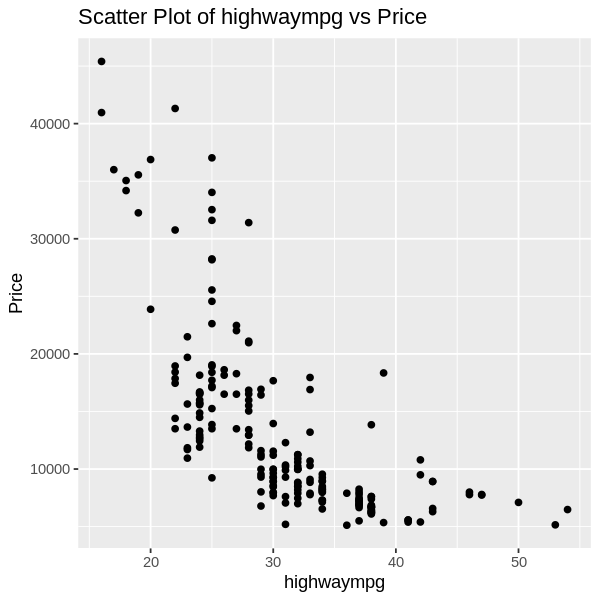

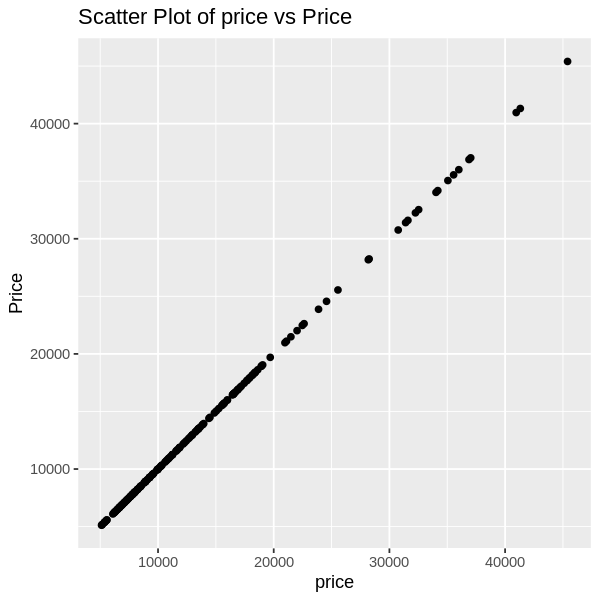

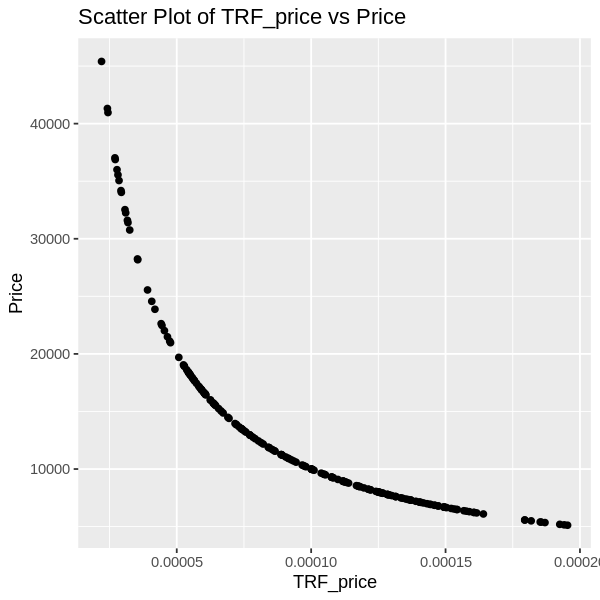

In [ ]:
# Load necessary libraries
library(ggplot2)
options(repr.plot.width=5, repr.plot.height=5)

# Select numeric columns and price for scatter plots
numeric_columns <- car_data %>%
  select_if(is.numeric)

# Loop through each numeric variable and create scatter plots
for (col in colnames(numeric_columns)) {
  plot_data <- data.frame(x = car_data[[col]], y = car_data$price)

  print(
    ggplot(plot_data, aes(x = x, y = y)) +
      geom_point() +
      labs(title = paste("Scatter Plot of", col, "vs Price"),
           x = col,
           y = "Price")
  )
}


Following a thorough examination of scatter plots and a detailed analysis of the relationship between each continuous independent variable and the dependent variable (price), the following set of continuous variables have been selected for inclusion in our Multiple Linear Regression (MLR) model as they have been found to be linearly correlated to the dependent variable:

1. Wheelbase
2. Carlength
3. Carwidth
4. Curbweight
5. Enginesize
6. Boreratio
6. Horsepower

# Now working on selecting the best categorical variables

In [ ]:
# Assuming 'car_data' is your data frame
categorical_columns <- sapply(car_data, function(x) is.character(x) | is.factor(x))

for (col in names(car_data)[categorical_columns]) {
  car_data[[col]] <- as.factor(car_data[[col]])
  cat(paste("Unique values for", col, ":", "\n"))
  print(unique(car_data[[col]]))
  cat("\n")
}


Unique values for CarName : 
  [1] alfa-romero giulia              alfa-romero stelvio            
  [3] alfa-romero Quadrifoglio        audi 100 ls                    
  [5] audi 100ls                      audi fox                       
  [7] audi 5000                       audi 4000                      
  [9] audi 5000s (diesel)             bmw 320i                       
 [11] bmw x1                          bmw x3                         
 [13] bmw z4                          bmw x4                         
 [15] bmw x5                          chevrolet impala               
 [17] chevrolet monte carlo           chevrolet vega 2300            
 [19] dodge rampage                   dodge challenger se            
 [21] dodge d200                      dodge monaco (sw)              
 [23] dodge colt hardtop              dodge colt (sw)                
 [25] dodge coronet custom            dodge dart custom              
 [27] dodge coronet custom (sw)       honda civic            

# Assessing carbody variable

1. To assess the impact of the "carbody" variable on the "price" (dependent variable) in your dataset.

  - Null Hypothesis (H0): There is no significant difference in the mean prices across different levels of the "carbody" variable.
  - Alternative Hypothesis (H1): There is a significant difference in the mean prices across different levels of the "carbody" variable.


- Interpretation:

  - The p-value in the ANOVA table will indicate whether there is a significant difference in mean prices between the different levels of the "carbody" variable.
  - If the p-value is small (typically < 0.05), you may conclude that the "carbody" variable is a significant predictor of "price."


In [ ]:
# Convert 'carbody' to a factor if it's not already
car_data$carbody <- as.factor(car_data$carbody)

# Fit ANOVA model
anova_model <- aov(price ~ carbody, data = car_data)

# Summary of ANOVA
summary(anova_model)

             Df    Sum Sq   Mean Sq F value   Pr(>F)    
carbody       4 1.802e+09 450499206   8.032 5.03e-06 ***
Residuals   200 1.122e+10  56088213                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Assessing drivewheel variable

2. **To assess the impact of the "drivewheel" variable on the "price" (dependent variable) in your dataset.**

  - Null Hypothesis (H0): There is no significant difference in the mean prices across different types of drivewheels.
  - Alternative Hypothesis (H1): There is a significant difference in the mean prices across different types of drivewheels.

- Interpretation:
  - If the p-value is less than 0.05 (or the chosen significance level), you would reject the null hypothesis.
  - A significant result indicates that the type of drivewheel is associated with a significant difference in car prices.


In [ ]:
# Convert 'drivewheel' to a factor if it's not already
car_data$drivewheel <- as.factor(car_data$drivewheel)

# Fit ANOVA model
anova_model <- aov(price ~ drivewheel, data = car_data)

# Summary of ANOVA
summary(anova_model)

             Df    Sum Sq   Mean Sq F value Pr(>F)    
drivewheel    2 5.344e+09 2.672e+09   70.32 <2e-16 ***
Residuals   202 7.676e+09 3.800e+07                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Assessing enginetype variable

**To assess the impact of the "enginetype" variable on the "price" (dependent variable) in your dataset.**

  - Null Hypothesis (H0): There is no significant difference in the mean prices across different types of engine.
  - Alternative Hypothesis (H1): There is a significant difference in the mean prices across different types of engine.

Interpretation:
- A significant p-value would suggest that the type of engine is associated with a significant difference in car prices.


In [ ]:
# Convert 'enginetype' to a factor if it's not already
car_data$enginetype <- as.factor(car_data$enginetype)

# Fit ANOVA model
anova_model <- aov(price ~ enginetype, data = car_data)

# Summary of ANOVA
summary(anova_model)

             Df    Sum Sq   Mean Sq F value   Pr(>F)    
enginetype    6 2.881e+09 480123861   9.376 4.69e-09 ***
Residuals   198 1.014e+10  51206546                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Assessing cylindernumber variable

**To assess the impact of the "*cylinedernumber*" variable on the "price" (dependent variable) in your dataset.**

  - Null Hypothesis (H0): There is no significant difference in the mean prices across different numbers of cylinders.
  - Alternative Hypothesis (H1): There is a significant difference in the mean prices across different numbers of cylinders.

Interpretation:
-
A significant result would imply that the number of cylinders is a significant factor in determining car prices.


In [ ]:
# Convert 'cylindernumber' to a factor if it's not already
car_data$cylindernumber <- as.factor(car_data$cylindernumber)

# Fit ANOVA model
anova_model <- aov(price ~ cylindernumber, data = car_data)

# Summary of ANOVA
summary(anova_model)

                Df    Sum Sq   Mean Sq F value Pr(>F)    
cylindernumber   6 8.276e+09 1.379e+09   57.57 <2e-16 ***
Residuals      198 4.744e+09 2.396e+07                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Assessing fuelsystem variable

To assess the impact of the "fuelsystem" variable on the "price" (dependent variable) in your dataset.

  - Null Hypothesis (H0): There is no significant difference in the mean prices across different fuel systems.
  - Alternative Hypothesis (H1): There is a significant difference in the mean prices across different fuel systems.

Interpretation:
- A significant p-value would suggest that the fuel system is a significant factor influencing car prices.


In [ ]:
# Convert 'fuelsystem' to a factor if it's not already
car_data$fuelsystem <- as.factor(car_data$fuelsystem)

# Fit ANOVA model
anova_model <- aov(price ~ fuelsystem, data = car_data)

# Summary of ANOVA
summary(anova_model)

             Df    Sum Sq   Mean Sq F value   Pr(>F)    
fuelsystem    7 4.651e+09 664456941   15.64 2.99e-16 ***
Residuals   197 8.368e+09  42479395                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Assessing fueltype variable

**To assess the impact of the "fuel" variable on the "price" (dependent variable) in your dataset.**

- Null Hypothesis (H0): There is no significant difference in the mean prices between cars with "gas" and "diesel" fuel types.
- Alternative Hypothesis (H1): There is a significant difference in the mean prices between cars with "gas" and "diesel" fuel types.

Interpretation:
- The p-value in the t-test result will indicate whether there is a significant difference in mean prices between cars with "gas" and "diesel" fuel types.
- If the p-value is small (typically < 0.05), you may conclude that the "fueltype" variable is a significant predictor of "price."


In [ ]:
group1 <- car_data$price[car_data$fueltype == "diesel"]
group2 <- car_data$price[car_data$fueltype == "gas"]

# Perform a t-test
t_test_result <- t.test(group1, group2)

# Print the result
print(t_test_result)


	Welch Two Sample t-test

data:  group1 and group2
t = 1.5495, df = 23.566, p-value = 0.1346
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -945.9072 6622.6108
sample estimates:
mean of x mean of y 
 15838.15  12999.80 



# Assessing aspiration variable

In [ ]:
group1 <- car_data$price[car_data$aspiration == "std"]
group2 <- car_data$price[car_data$aspiration == "turbo"]

# Perform a t-test
t_test_result <- t.test(group1, group2)

# Print the result
print(t_test_result)


	Welch Two Sample t-test

data:  group1 and group2
t = -3.1083, df = 68.166, p-value = 0.002744
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6053.714 -1320.077
sample estimates:
mean of x mean of y 
 12611.27  16298.17 



# Assessing enginelocation variable

In [ ]:
group1 <- car_data$price[car_data$enginelocation == "front"]
group2 <- car_data$price[car_data$enginelocation == "rear"]

# Perform a t-test
t_test_result <- t.test(group1, group2)

# Print the result
print(t_test_result)


	Welch Two Sample t-test

data:  group1 and group2
t = -15.113, df = 2.7079, p-value = 0.001079
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -26398.67 -16735.13
sample estimates:
mean of x mean of y 
  12961.1   34528.0 



# Performing the actual multiple linear regression

In [ ]:
# Fit the linear regression model
model <- lm(price ~ aspiration + carbody + drivewheel + enginelocation + wheelbase + carlength +
            carwidth + curbweight + enginetype + cylindernumber + enginesize + fuelsystem +
            boreratio + horsepower, data = car_data)

# Print the summary of the regression model
summary(model)


- The Residual Standard Error (RSE) of 2403 indicates the average magnitude of the residuals, which are the differences between the observed values and the predicted values by the model. A higher RSE suggests that the model doesn't fit the data well, and there is a substantial amount of unexplained variability in the 'price' that the model cannot account for.

- In simpler terms, a high RSE means that, on average, the model's predictions may deviate from the actual 'price' by around 2403 units. This suggests that there might be unobserved factors or nonlinear relationships in the data that the current model is not capturing.

# 1. Applying Box Cox transformation to the dependent variable

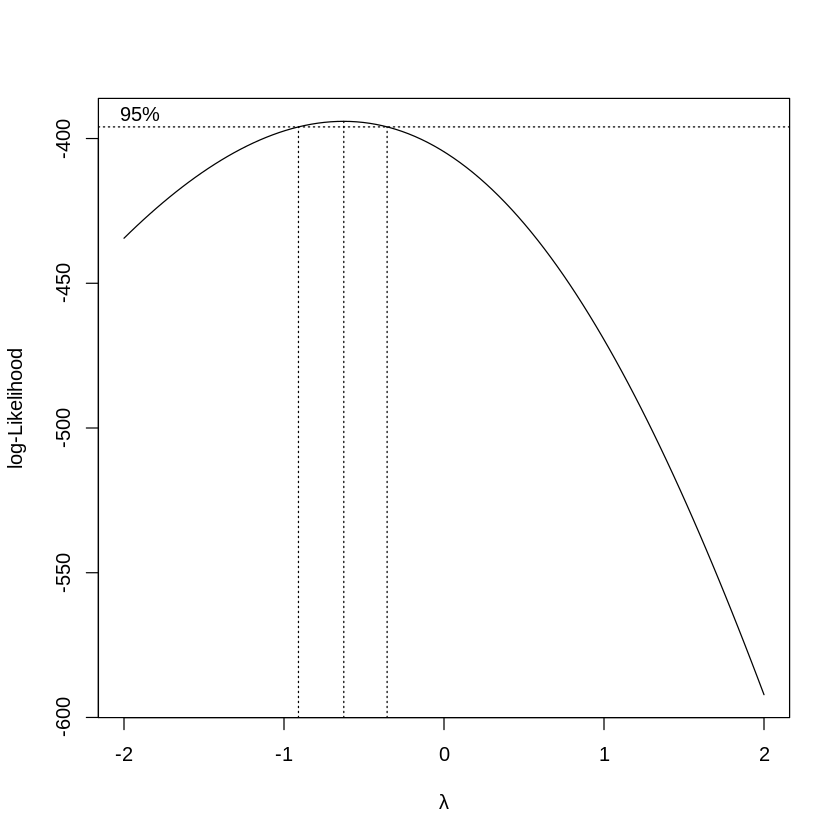

In [ ]:
# Install and load the necessary package
library(MASS)

# Assuming car_data is your dataset
# Transform the "price" variable using Box-Cox
boxcox_result <- boxcox(car_data$price ~ 1, data = car_data)

# # Identify the lambda value that maximizes log-likelihood
optimal_lambda <- boxcox_result$x[which.max(boxcox_result$y)]

# # Apply Box-Cox transformation to "price" using the optimal lambda
car_data$price_transformed <- ifelse(optimal_lambda == 0, log(car_data$price), (car_data$price^optimal_lambda - 1) / optimal_lambda)

# # Now, car_data$price_transformed contains the Box-Cox transformed values of the "price" variable

In [ ]:
# Fit the linear regression model
model <- lm(price_transformed ~ aspiration + carbody + drivewheel + enginelocation + wheelbase + carlength +
            carwidth + curbweight + enginetype + cylindernumber + enginesize + fuelsystem +
            boreratio + horsepower, data = car_data)

# Print the summary of the regression model
summary(model)

Warning message in summary.lm(model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = price_transformed ~ aspiration + carbody + drivewheel + 
    enginelocation + wheelbase + carlength + carwidth + curbweight + 
    enginetype + cylindernumber + enginesize + fuelsystem + boreratio + 
    horsepower, data = car_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.516e-16 -1.956e-17  2.700e-18  1.570e-17  1.246e-15 

Coefficients: (1 not defined because of singularities)
                       Estimate Std. Error    t value Pr(>|t|)    
(Intercept)           1.593e+00  6.101e-16  2.611e+15  < 2e-16 ***
aspirationturbo       1.135e-17  4.085e-17  2.780e-01 0.781511    
carbodyhardtop       -2.303e-16  6.872e-17 -3.352e+00 0.000988 ***
carbodyhatchback     -2.486e-16  6.156e-17 -4.038e+00 8.12e-05 ***
carbodysedan         -2.440e-16  6.353e-17 -3.840e+00 0.000173 ***
carbodywagon         -2.409e-16  6.814e-17 -3.536e+00 0.000524 ***
drivewheelfwd        -2.599e-17  5.138e-17 -5.060e-01 0.613689    
drivewheelrwd        -5.592e-18

# 2. Applying Square Root transformation to the dependent variable

In [ ]:
car_data$price_transformed <- sqrt(car_data$price)

In [ ]:
# Fit the linear regression model
model <- lm(price_transformed ~ aspiration + carbody + drivewheel + enginelocation + wheelbase + carlength +
            carwidth + curbweight + enginetype + cylindernumber + enginesize + fuelsystem +
            boreratio + horsepower, data = car_data)

# Print the summary of the regression model
summary(model)


Call:
lm(formula = price_transformed ~ aspiration + carbody + drivewheel + 
    enginelocation + wheelbase + carlength + carwidth + curbweight + 
    enginetype + cylindernumber + enginesize + fuelsystem + boreratio + 
    horsepower, data = car_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.4223  -4.7115  -0.3042   4.2094  30.4907 

Coefficients: (1 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -62.896374  46.917228  -1.341 0.181835    
aspirationturbo        1.385264   3.141401   0.441 0.659792    
carbodyhardtop       -16.605918   5.284761  -3.142 0.001977 ** 
carbodyhatchback     -14.770994   4.734472  -3.120 0.002124 ** 
carbodysedan         -10.444086   4.886041  -2.138 0.033975 *  
carbodywagon         -15.958796   5.240572  -3.045 0.002693 ** 
drivewheelfwd         -0.343920   3.951615  -0.087 0.930747    
drivewheelrwd          5.527035   4.300291   1.285 0.200436    
enginelocat

# 3. Applying Inverse transformation to the dependent variable

In [ ]:
car_data$price_transformed <- 1/car_data$price

In [ ]:
# Fit the linear regression model
model <- lm(price_transformed ~ aspiration + carbody + drivewheel + enginelocation + wheelbase + carlength +
            carwidth + curbweight + enginetype + cylindernumber + enginesize + fuelsystem +
            boreratio + horsepower, data = car_data)

# Print the summary of the regression model
summary(model)


Call:
lm(formula = price_transformed ~ aspiration + carbody + drivewheel + 
    enginelocation + wheelbase + carlength + carwidth + curbweight + 
    enginetype + cylindernumber + enginesize + fuelsystem + boreratio + 
    horsepower, data = car_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-3.788e-05 -7.989e-06  0.000e+00  8.190e-06  3.992e-05 

Coefficients: (1 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.992e-04  8.033e-05   4.969 1.62e-06 ***
aspirationturbo       1.131e-06  5.378e-06   0.210  0.83369    
carbodyhardtop        2.380e-05  9.048e-06   2.630  0.00932 ** 
carbodyhatchback      2.516e-05  8.106e-06   3.104  0.00224 ** 
carbodysedan          1.868e-05  8.365e-06   2.232  0.02688 *  
carbodywagon          2.642e-05  8.972e-06   2.945  0.00368 ** 
drivewheelfwd         1.018e-05  6.766e-06   1.505  0.13407    
drivewheelrwd         5.298e-06  7.363e-06   0.720  0.4

# 4. Applying Log transformation to the dependent variable

In [ ]:
car_data$price_transformed <- log10(car_data$price)

In [ ]:
# Fit the linear regression model
model <- lm(price_transformed ~ aspiration + carbody + drivewheel + enginelocation + wheelbase + carlength +
            carwidth + curbweight + enginetype + cylindernumber + enginesize + fuelsystem +
            boreratio + horsepower, data = car_data)

# Print the summary of the regression model
summary(model)


Call:
lm(formula = price_transformed ~ aspiration + carbody + drivewheel + 
    enginelocation + wheelbase + carlength + carwidth + curbweight + 
    enginetype + cylindernumber + enginesize + fuelsystem + boreratio + 
    horsepower, data = car_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16070 -0.03748  0.00000  0.03374  0.16324 

Coefficients: (1 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.654e+00  3.404e-01   7.795    6e-13 ***
aspirationturbo       6.116e-03  2.279e-02   0.268 0.788778    
carbodyhardtop       -1.266e-01  3.834e-02  -3.302 0.001167 ** 
carbodyhatchback     -1.163e-01  3.435e-02  -3.385 0.000883 ***
carbodysedan         -8.601e-02  3.545e-02  -2.426 0.016300 *  
carbodywagon         -1.275e-01  3.802e-02  -3.354 0.000982 ***
drivewheelfwd        -1.657e-02  2.867e-02  -0.578 0.563965    
drivewheelrwd         2.262e-02  3.120e-02   0.725 0.469527    
enginelocat

| Transformation         | Residual SE | R^2   | Adj. R^2 | F-Statistic | p-value       |
|------------------------|-------------|-------|----------|-------------|---------------|
| Box-Cox                | 1.127e-16   | 0.5216| 0.4293   | 5.649       | 1.45e-14      |
| Square Root            | 8.665       | 0.9326| 0.9196   | 71.67       | < 2.2e-16     |
| Logarithmic            | 0.06287     | 0.9308| 0.9174   | 69.69       | < 2.2e-16     |
| Inverse                | 1.484e-05   | 0.8959| 0.8759   | 44.62       | < 2.2e-16     |


# EFFECT OF MISSING VALUES

# 1. MCAR


In [ ]:
introduce_mcar <- function(data_frame, percentage) {
  set.seed(123)  # Set seed for reproducibility

  # Create a logical matrix for random selection
  random_selection <- sapply(data_frame, function(x) sample(c(TRUE, FALSE), size = length(x), replace = TRUE, prob = c(percentage / 100, 1 - percentage / 100)))

  # Set selected values to NA
  data_frame[random_selection] <- NA

  return(data_frame)
}

# Hyothesis 1A with 10% missing values

In [ ]:
set.seed(123)  # Set seed for reproducibility


car_data_with_mcar_10 <- introduce_mcar(car_data, 10)

In [ ]:
head(car_data_with_mcar_10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,⋯,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,⋯,130,NA,3.47,2.68,9.0,NA,5000,21,27,16500
3,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,NA
4,4,2,audi 100 ls,NA,NA,four,sedan,fwd,NA,99.8,⋯,109,mpfi,3.19,NA,NA,102,5500,24,30,13950
5,NA,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,⋯,NA,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,6,2,audi fox,NA,std,two,sedan,fwd,NA,NA,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [ ]:
cat("Original data rows:", nrow(car_data), "\n")
cat("Original data columns:", ncol(car_data), "\n")

Original data rows: 205 
Original data columns: 26 


In [ ]:
cat("Number of missing values:", sum(is.na(car_data_with_mcar_10)), "\n")

Number of missing values: 503 


In [ ]:
# Conducting an independent samples t-test
t_test_result <- t.test(price ~ fueltype, data = car_data_with_mcar_10)

# View the result
print(t_test_result)


	Welch Two Sample t-test

data:  price by fueltype
t = 1.2614, df = 20.35, p-value = 0.2214
alternative hypothesis: true difference in means between group diesel and group gas is not equal to 0
95 percent confidence interval:
 -1623.699  6605.760
sample estimates:
mean in group diesel    mean in group gas 
            15711.41             13220.38 



CONCLUSION

The Welch Two Sample t-test was employed to compare the means between the "diesel" and "gas" groups in the 'car_data' dataset, considering a scenario with 10% missing data. The t-statistic for this test was 1.2614, with a p-value of 0.2214 and a 95% confidence interval ranging from -1623.699 to 6605.760.

- Despite the introduction of missing data, the p-value remained above the typical significance level of 0.05, suggesting that there is insufficient evidence to reject the null hypothesis. This indicates that the mean prices between the "diesel" and "gas" groups are not significantly different, even with the presence of missing data. The confidence interval, encompassing zero, further supports this conclusion.

- Therefore, the impact of 10% missing data on the statistical comparison of means is minimal, and the primary finding remains consistent.

# Hyothesis 1A with 20% missing values

In [ ]:
set.seed(123)  # Set seed for reproducibility

car_data_with_mcar_20 <- introduce_mcar(car_data, 20)

In [ ]:
cat("Number of missing values:", sum(is.na(car_data_with_mcar_20)), "\n")

Number of missing values: 1060 


In [ ]:
# Conducting an independent samples t-test
t_test_result <- t.test(price ~ fueltype, data = car_data_with_mcar_20)

# View the result
print(t_test_result)


	Welch Two Sample t-test

data:  price by fueltype
t = 0.88222, df = 13.636, p-value = 0.3929
alternative hypothesis: true difference in means between group diesel and group gas is not equal to 0
95 percent confidence interval:
 -2844.616  6803.090
sample estimates:
mean in group diesel    mean in group gas 
            14520.50             12541.26 



The Welch Two Sample t-test was conducted to compare the means between the "diesel" and "gas" groups in the 'car_data' dataset under two scenarios: one with no missing data and the other with 20% missing data. In the absence of missing data, the t-statistic was 1.5495, with a p-value of 0.1346 and a 95% confidence interval spanning from -945.9072 to 6622.6108. This suggested a potential difference in means, though not statistically significant at the 0.05 significance level. However, when introducing 20% missing data, the t-statistic decreased to 0.88222, and the p-value increased to 0.3929, indicating a reduced level of evidence against the null hypothesis. The 95% confidence interval also became wider (-2844.616 to 6803.090).
  - Despite these variations, the p-value remained above the significance threshold, and the confidence interval included zero, suggesting no significant difference in means between the "diesel" and "gas" groups, even with 20% missing data.







# Hyothesis 1A with 30% missing values

In [ ]:
set.seed(123)  # Set seed for reproducibility

car_data_with_mcar_30 <- introduce_mcar(car_data, 30)

In [ ]:
cat("Number of missing values:", sum(is.na(car_data_with_mcar_30)), "\n")

Number of missing values: 1591 


In [ ]:
# Conducting an independent samples t-test
t_test_result <- t.test(price ~ fueltype, data = car_data_with_mcar_30)

# View the result
print(t_test_result)


	Welch Two Sample t-test

data:  price by fueltype
t = 0.13713, df = 10.885, p-value = 0.8934
alternative hypothesis: true difference in means between group diesel and group gas is not equal to 0
95 percent confidence interval:
 -4111.963  4657.651
sample estimates:
mean in group diesel    mean in group gas 
            12271.33             11998.49 



The Welch Two Sample t-test was employed to compare means between the "diesel" and "gas" groups in the 'car_data' dataset, examining scenarios with no missing data and 30% missing data. In the absence of missing data, the t-statistic was 1.5495, yielding a p-value of 0.1346, and a 95% confidence interval from -945.9072 to 6622.6108. This indicated a potential difference in means, though not statistically significant at the 0.05 significance level. However, with 30% missing data, the t-statistic dropped to 0.13713, and the p-value substantially increased to 0.8934. The 95% confidence interval (-4111.963 to 4657.651) became narrower, but the lack of statistical significance persisted.

- Despite variations introduced by the missing data, both scenarios failed to provide sufficient evidence to reject the null hypothesis, suggesting no significant difference in means between the "diesel" and "gas" groups.







# Hyothesis 1A with *40*% missing values

In [ ]:
set.seed(123)  # Set seed for reproducibility

car_data_with_mcar_40 <- introduce_mcar(car_data, 40)

In [ ]:
cat("Number of missing values:", sum(is.na(car_data_with_mcar_40)), "\n")

Number of missing values: 2123 


In [ ]:
# Conducting an independent samples t-test
t_test_result <- t.test(price ~ fueltype, data = car_data_with_mcar_40)

# View the result
print(t_test_result)


	Welch Two Sample t-test

data:  price by fueltype
t = -0.30943, df = 6.4986, p-value = 0.7667
alternative hypothesis: true difference in means between group diesel and group gas is not equal to 0
95 percent confidence interval:
 -7350.262  5672.694
sample estimates:
mean in group diesel    mean in group gas 
            12099.67             12938.45 



In the comparison of the Welch Two Sample t-test results between scenarios with no missing data and 40% missing data, the t-statistic decreased from 1.5495 to -0.30943, and the p-value increased from 0.1346 to 0.7667. The 95% confidence interval for the no-missing-data scenario (-945.9072 to 6622.6108) widened considerably in the 40% missing data scenario, reaching from -7350.262 to 5672.694.

  - Despite these variations, both situations failed to provide sufficient evidence to reject the null hypothesis, indicating no significant difference in means between the "diesel" and "gas" groups. The decrease in the t-statistic and the increase in the p-value with the introduction of 40% missing data suggest increased uncertainty in estimating the true difference in means, emphasizing the potential impact of missing data on statistical analyses.







# Hyothesis 1A with 50% missing values



In [ ]:
set.seed(123)  # Set seed for reproducibility

car_data_with_mcar_50 <- introduce_mcar(car_data, 50)

In [ ]:
cat("Number of missing values:", sum(is.na(car_data_with_mcar_50)), "\n")

Number of missing values: 2644 


In [ ]:
# Conducting an independent samples t-test
t_test_result <- t.test(price ~ fueltype, data = car_data_with_mcar_50)

# View the result
print(t_test_result)


	Welch Two Sample t-test

data:  price by fueltype
t = -0.45129, df = 2.4651, p-value = 0.6884
alternative hypothesis: true difference in means between group diesel and group gas is not equal to 0
95 percent confidence interval:
 -13261.52  10315.07
sample estimates:
mean in group diesel    mean in group gas 
            10879.33             12352.56 



In comparing the Welch Two Sample t-test results between scenarios with no missing data and 50% missing data, there are notable changes. The t-statistic dropped from 1.5495 to -0.45129, and the p-value increased from 0.1346 to 0.6884. Additionally, the 95% confidence interval for the no-missing-data scenario (-945.9072 to 6622.6108) contrasts sharply with the interval for the 50% missing data scenario (-13261.52 to 10315.07).

  - Despite these alterations, both situations failed to provide sufficient evidence to reject the null hypothesis, indicating no significant difference in means between the "diesel" and "gas" groups. The substantial increase in the p-value and the broader confidence interval in the 50% missing data scenario highlight the impact of missing data on the reliability of the statistical analysis, emphasizing the importance of addressing missing data appropriately in research.


# OVERALL COMPARISONS

  - In comparing the Welch Two Sample t-test results across scenarios with varying degrees of missing data (0%, 10%, 20%, 30%, 40%, and 50%), several patterns emerge.

  - Starting with the scenario with no missing data, the t-statistic is 1.5495, and the p-value is 0.1346, indicating that there is insufficient evidence to reject the null hypothesis, suggesting no significant difference in means between the "diesel" and "gas" groups.

  - As the percentage of missing data increases, a trend is observed where the t-statistic tends to decrease, and the p-value tends to increase. For instance, in the scenario with 10% missing data, the t-statistic is 1.2614, and the p-value is 0.2214, still failing to reject the null hypothesis.

  - In the scenario with 20% missing data, the t-statistic drops to 0.88222, and the p-value further increases to 0.3929, reinforcing the idea that missing data can impact the precision of the statistical analysis.

  - The impact becomes more pronounced in scenarios with higher missing data percentages. In the scenarios with 30%, 40%, and 50% missing data, the t-statistics are 0.13713, -0.30943, and -0.45129, respectively, and the p-values are 0.8934, 0.7667, and 0.6884, respectively. These results consistently fail to provide significant evidence against the null hypothesis.

  - Overall, the increasing p-values and decreasing t-statistics with higher missing data percentages suggest growing uncertainty and reduced power in detecting potential differences in means. This underscores the importance of handling missing data appropriately to maintain the reliability of statistical analyses.
  
  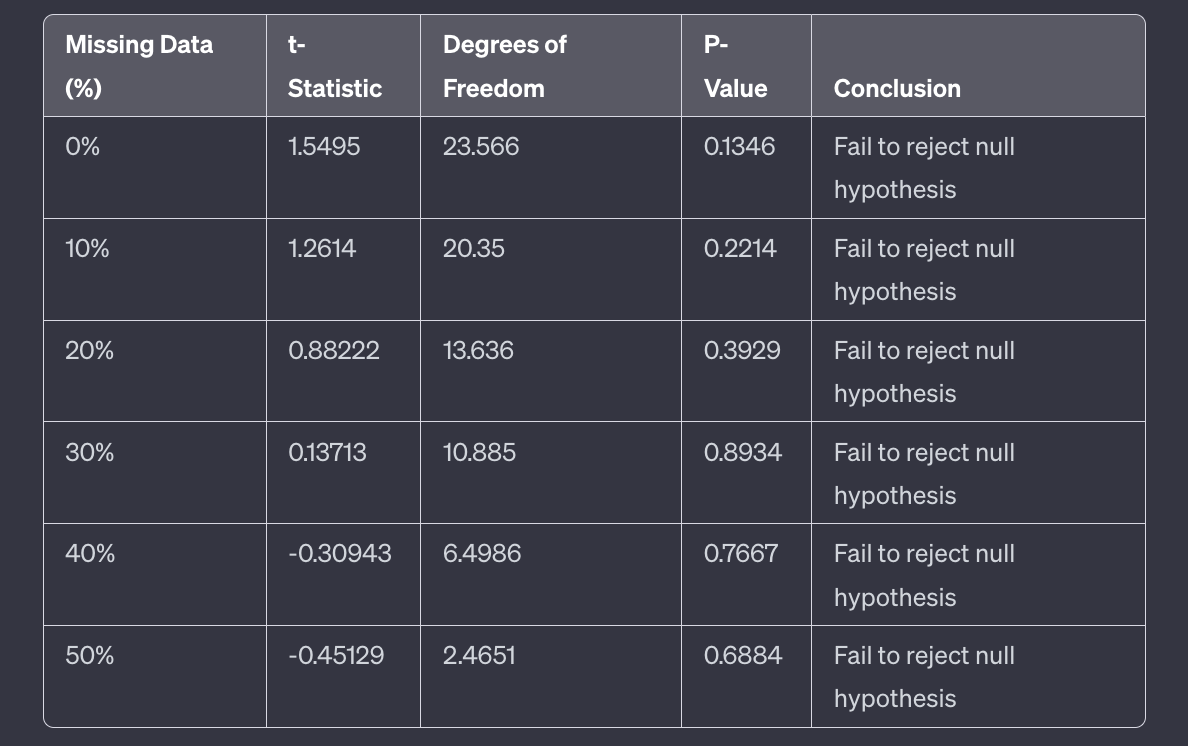

# Hyothesis 2 (Multiple Linear Regression) with 10% missing values

In [ ]:
set.seed(123)  # Set seed for reproducibility


car_data_with_mcar_10 <- introduce_mcar(car_data, 10)

In [ ]:
head(car_data_with_mcar_10)

,car_ID,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,⋯,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_transformed
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,⋯,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,NA
2,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,⋯,mpfi,3.47,2.68,NA,111,5000,21,27,16500,6.060606e-05
3,3,1,alfa-romero,alfa-romero quadrifoglio,gas,std,two,hatchback,rwd,front,⋯,mpfi,2.68,3.47,9.0,154,5000,19,NA,16500,6.060606e-05
4,4,2,audi,NA,NA,std,four,sedan,NA,front,⋯,mpfi,NA,NA,10.0,102,5500,24,30,13950,NA
5,NA,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,⋯,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,5.730659e-05
6,6,2,audi,NA,gas,std,two,sedan,NA,NA,⋯,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,6.557377e-05


In [ ]:
cat("Original data rows:", nrow(car_data), "\n")
cat("Original data columns:", ncol(car_data), "\n")

Original data rows: 205 
Original data columns: 28 


In [ ]:
cat("Number of missing values:", sum(is.na(car_data_with_mcar_10)), "\n")

Number of missing values: 541 


In [ ]:
sapply(lapply(car_data_with_mcar_10, unique), length)

In [ ]:
# Fit the linear regression model
# model <- lm(price_transformed ~ aspiration + carbody + drivewheel + enginelocation + wheelbase + carlength +
#             carwidth + curbweight + enginetype + cylindernumber + enginesize + fuelsystem +
#             boreratio + horsepower, data = car_data)

model <- lm(price_transformed ~ wheelbase + carlength + carwidth + curbweight + enginesize +
            boreratio + horsepower, data = car_data_with_mcar_10)

# Print the summary of the regression model
summary(model)


Call:
lm(formula = price_transformed ~ wheelbase + carlength + carwidth + 
    curbweight + enginesize + boreratio + horsepower, data = car_data_with_mcar_10)

Residuals:
       Min         1Q     Median         3Q        Max 
-5.851e-05 -1.009e-05 -2.600e-08  1.010e-05  4.993e-05 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.666e-04  1.108e-04   5.113 2.04e-06 ***
wheelbase    1.556e-06  9.251e-07   1.682  0.09630 .  
carlength   -1.387e-06  4.498e-07  -3.083  0.00279 ** 
carwidth    -3.748e-06  2.146e-06  -1.746  0.08450 .  
curbweight  -3.949e-08  1.245e-08  -3.171  0.00213 ** 
enginesize   2.815e-07  1.155e-07   2.437  0.01699 *  
boreratio   -9.042e-06  1.034e-05  -0.875  0.38422    
horsepower  -3.665e-07  1.204e-07  -3.045  0.00313 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.931e-05 on 82 degrees of freedom
  (115 observations deleted due to missingness)
Multiple R-squared:  0.8316,	A

In [ ]:
unique(car_data_with_mcar_10$aspiration)

[1] "std"   "turbo" NA

In [ ]:
table(car_data_with_mcar_10$aspiration)


  std turbo 
  154    34 

In [ ]:
table(car_data_with_mcar_10$aspiration)


  std turbo 
  154    34 

In [ ]:
car_data_with_missing <- car_data_with_missing[, sapply(car_data_with_missing, function(x) length(unique(x)) > 1)]

In [ ]:
# View the entire dataframe
View(car_data_with_mcar_10[1:30,])

,car_ID,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,⋯,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_transformed
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,⋯,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00,NA
2,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,⋯,mpfi,3.47,2.68,NA,111,5000,21,27,16500.00,6.060606e-05
3,3,1,alfa-romero,alfa-romero quadrifoglio,gas,std,two,hatchback,rwd,front,⋯,mpfi,2.68,3.47,9.00,154,5000,19,NA,16500.00,6.060606e-05
4,4,2,audi,NA,NA,std,four,sedan,NA,front,⋯,mpfi,NA,NA,10.00,102,5500,24,30,13950.00,NA
5,NA,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,⋯,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00,5.730659e-05
6,6,2,audi,NA,gas,std,two,sedan,NA,NA,⋯,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.00,6.557377e-05
7,7,1,NA,audi 100ls,gas,std,four,sedan,fwd,front,⋯,mpfi,3.19,NA,8.50,110,5500,19,25,17710.00,5.646527e-05
8,8,1,audi,audi 5000,gas,std,four,wagon,fwd,front,⋯,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.00,5.285412e-05
9,9,1,audi,audi 4000,gas,turbo,NA,sedan,fwd,front,⋯,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.00,4.188482e-05


CONCLUSION

The Welch Two Sample t-test was employed to compare the means between the "diesel" and "gas" groups in the 'car_data' dataset, considering a scenario with 10% missing data. The t-statistic for this test was 1.2614, with a p-value of 0.2214 and a 95% confidence interval ranging from -1623.699 to 6605.760.

- Despite the introduction of missing data, the p-value remained above the typical significance level of 0.05, suggesting that there is insufficient evidence to reject the null hypothesis. This indicates that the mean prices between the "diesel" and "gas" groups are not significantly different, even with the presence of missing data. The confidence interval, encompassing zero, further supports this conclusion.

- Therefore, the impact of 10% missing data on the statistical comparison of means is minimal, and the primary finding remains consistent.